https://mlrose.readthedocs.io/en/stable/source/tutorial1.html

# Installing and Importing Packages

In [27]:
#!pip uninstall mlrose_hiive

In [28]:
#!pip uninstall joblib

In [29]:
!pip install joblib==1.2.0

In [30]:
!pip install mlrose_hiive

In [31]:
import pandas as pd
import numpy as np
import gc
import numpy as np
import mlrose_hiive as mlrose

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics #Import scikit-learn metrics module for ac
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
import torch
from torch import nn, optim
from torch.nn import functional as F
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

import time

np.random.seed(42)

# Importing Data and Processing

In [32]:
url = 'https://raw.githubusercontent.com/AaronScherf/ML_As1_SL/main/housing.csv'
housing = pd.read_csv(url)
# remove outliers of over 500000 in value
housing.drop(housing[housing['median_house_value'] > 500000].index, inplace=True)
housing = housing.sample(frac = 1,random_state=42).reset_index()
y_housing = pd.DataFrame(housing['median_house_value'])
X_housing = housing.drop('median_house_value',axis=1)

In [33]:
X_housing.shape

(19675, 10)

In [34]:
y_housing

,median_house_value
0,104200.0
1,171200.0
2,97300.0
3,102700.0
4,116500.0
...,...
19670,137500.0
19671,125000.0
19672,141300.0
19673,300000.0


In [35]:
X_housing

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,15065,-116.96,32.80,24.0,2493.0,693.0,1420.0,643.0,1.8357,<1H OCEAN
1,14534,-117.14,32.93,14.0,1946.0,463.0,1205.0,390.0,4.2109,<1H OCEAN
2,13570,-117.29,34.14,52.0,1683.0,266.0,646.0,256.0,4.0481,INLAND
3,2607,-124.01,40.97,21.0,1513.0,319.0,943.0,301.0,3.5380,<1H OCEAN
4,12750,-121.38,38.62,34.0,2352.0,610.0,1127.0,592.0,2.2000,INLAND
...,...,...,...,...,...,...,...,...,...,...
19670,11866,-121.08,40.19,11.0,919.0,199.0,69.0,43.0,1.6944,INLAND
19671,12552,-121.48,38.56,52.0,814.0,216.0,327.0,181.0,2.8542,INLAND
19672,5627,-118.27,33.77,39.0,1731.0,485.0,2115.0,478.0,1.5369,NEAR OCEAN
19673,870,-121.93,37.49,5.0,1150.0,311.0,648.0,245.0,3.5714,<1H OCEAN


In [36]:
X_housing.describe()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19475.000000,19675.000000,19675.000000,19675.000000
mean,10284.914917,-119.563192,35.651780,28.386277,2619.763659,539.645751,1440.812198,501.186023,3.676717
std,5986.729218,2.006108,2.149802,12.509113,2181.348207,422.413200,1143.648725,383.264636,1.570272
min,0.000000,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900
25%,5040.500000,-121.760000,33.930000,18.000000,1438.000000,297.000000,796.000000,282.000000,2.526800
50%,10322.000000,-118.500000,34.270000,28.000000,2111.000000,436.000000,1179.000000,411.000000,3.450000
75%,15387.500000,-117.990000,37.730000,37.000000,3120.000000,648.000000,1746.000000,606.000000,4.582600
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [37]:
housing_numeric = X_housing.columns[0:8]
imputer=SimpleImputer(strategy="median")
imputer.fit(X_housing[housing_numeric])
imputer.statistics_

array([10322.  ,  -118.5 ,    34.27,    28.  ,  2111.  ,   436.  ,
        1179.  ,   411.  ])

In [38]:
X_housing[housing_numeric]=pd.DataFrame(imputer.transform(X_housing[housing_numeric]),columns=X_housing[housing_numeric].columns)

X_housing

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,15065.0,-116.96,32.80,24.0,2493.0,693.0,1420.0,643.0,1.8357,<1H OCEAN
1,14534.0,-117.14,32.93,14.0,1946.0,463.0,1205.0,390.0,4.2109,<1H OCEAN
2,13570.0,-117.29,34.14,52.0,1683.0,266.0,646.0,256.0,4.0481,INLAND
3,2607.0,-124.01,40.97,21.0,1513.0,319.0,943.0,301.0,3.5380,<1H OCEAN
4,12750.0,-121.38,38.62,34.0,2352.0,610.0,1127.0,592.0,2.2000,INLAND
...,...,...,...,...,...,...,...,...,...,...
19670,11866.0,-121.08,40.19,11.0,919.0,199.0,69.0,43.0,1.6944,INLAND
19671,12552.0,-121.48,38.56,52.0,814.0,216.0,327.0,181.0,2.8542,INLAND
19672,5627.0,-118.27,33.77,39.0,1731.0,485.0,2115.0,478.0,1.5369,NEAR OCEAN
19673,870.0,-121.93,37.49,5.0,1150.0,311.0,648.0,245.0,3.5714,<1H OCEAN


In [39]:
# categorize housing data
#y_housing['median_house_value'] = pd.qcut(y_housing['median_house_value'], q=5, labels=False)
y_housing['median_house_value'] = y_housing['median_house_value'] > y_housing['median_house_value'].median()
y_housing = y_housing.astype(int)
y_housing

,median_house_value
0,0
1,0
2,0
3,0
4,0
...,...
19670,0
19671,0
19672,0
19673,1


# Explore Data

In [40]:
# importing custom matplotlib parameters for vizualizations
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams["font.family"] = "monospace";

# Color Palettes
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]


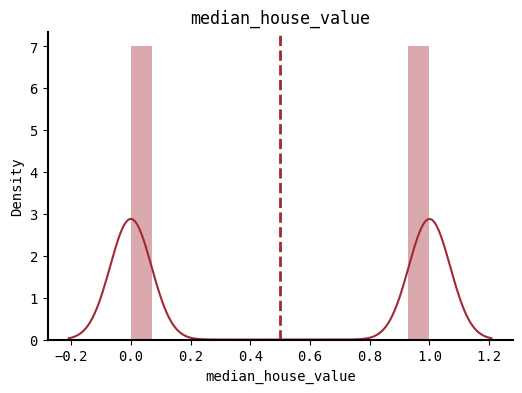

In [41]:
#checking the target variables for distribution
sns.distplot(y_housing['median_house_value'],color=colors[7])
plt.axvline(x=y_housing['median_house_value'].mean(), color=colors[7], linestyle='--', linewidth=2)
plt.title('median_house_value');

In [42]:
y_housing.describe()

,median_house_value
count,19675.000000
mean,0.499822
std,0.500013
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Neural Network

https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

https://medium.com/p/3a3656c726c1

In addition to analyzing discrete optimization problems, you will also use the first three algorithms to find good weights for a neural network. In particular, you will use them instead of backprop for the neural network you used in assignment #1 on at least one of the problems you created for assignment #1. Notice that this assignment is about an optimization problem and about supervised learning problems. That probably means that looking at only the loss or only the accuracy won’t tell you the whole story. Luckily, you have already learned how to write an analysis on optimization problems and on supervised learning problems; now you just have to integrate your knowledge.


You will compare backprop to RHC, SA, and GA while (hopefully) reusing one data set from A1.

To facilitate this, you'll need to freeze your network architecture from A1 (hidden layer size, activation functions, input / output layers, etc.) and use each of the RO algorithms as a backprop replacement for weight updates.


The weights in a neural network are continuous and real-valued instead of discrete so you might want to think a little bit about what it means to apply these sorts of algorithms in such a domain.
There are different loss and activation functions for NNs. If you use different libraries across your assignments, you need to make sure those are the same. For example, if you used scikit-learn and don’t modify the ABAGAIL example, they are not.


What kind of plots should I focus on for the NN section?

We're really looking for you to somehow compare your A2 results to your A1 NN results. Naturally, you might use some of the existing tools that you're already familiar with from A1. For example, things like learning curves. The iterative (or lossy) version of said visual would also fit into the whole notion of convergence that the assignment is trying convey anyway.

With that being said, if you'd like to focus on properties of bias and variance and the interactions of the RO algos with that, then feel free to do so.

Oh, and by the way, you should probably try hard to acclimate to thinking of trade-offs here. Hypothetically, a RO algorithm may actually do "better" than backprop but we should fairly and explicitly define what "better" means in terms of fitness, iterations, time, etc. Right?

In [43]:


'''processing numerical attributes'''

num_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),('std_scaler',StandardScaler())])
housing_num_tr=num_pipeline.fit_transform(X_housing[housing_numeric])

In [44]:
from sklearn.compose import ColumnTransformer

'''handling categorical and numerical attributes and combining them into a single pipeline'''

num_attribs=list(X_housing[housing_numeric])
cat_attribs=['ocean_proximity']
full_pipeline=ColumnTransformer([("num",num_pipeline,num_attribs),("cat",OneHotEncoder(),cat_attribs)])

In [45]:
housing_prepared=full_pipeline.fit_transform(housing)
housing_prepared.shape

(19675, 13)

In [46]:
y_housing = np.array(y_housing.astype(int))
X_train, X_test, y_train, y_test = train_test_split(housing_prepared, y_housing, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15740, 13)
(15740, 1)
(3935, 13)
(3935, 1)


In [ ]:

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal', input_dim=X_train.shape[1]))
#Second  Hidden Layer
#classifier.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))

#Output Layer
#classifier.add(Dense(5, activation='softmax'))
classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
#Compiling the neural network
#classifier.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
#Fitting the data to the training dataset
time_start = time.time()

history = classifier.fit(X_train, y_train, epochs=200,batch_size=int(X_train.shape[0]/100),  validation_data=(X_test, y_test), shuffle=True)
fit_time = time.time()
print(fit_time-time_start)

Epoch 1/200
101/101 [==============================] - 2s 7ms/step - loss: 0.6485 - accuracy: 0.6959 - val_loss: 0.5457 - val_accuracy: 0.7962
Epoch 2/200
101/101 [==============================] - 0s 4ms/step - loss: 0.4882 - accuracy: 0.7959 - val_loss: 0.4518 - val_accuracy: 0.7982
Epoch 3/200
101/101 [==============================] - 0s 4ms/step - loss: 0.4364 - accuracy: 0.8133 - val_loss: 0.4249 - val_accuracy: 0.8145
Epoch 4/200
101/101 [==============================] - 0s 4ms/step - loss: 0.4146 - accuracy: 0.8222 - val_loss: 0.4053 - val_accuracy: 0.8249
Epoch 5/200
101/101 [==============================] - 0s 4ms/step - loss: 0.4023 - accuracy: 0.8275 - val_loss: 0.3957 - val_accuracy: 0.8302
Epoch 6/200
101/101 [==============================] - 0s 4ms/step - loss: 0.3959 - accuracy: 0.8321 - val_loss: 0.3917 - val_accuracy: 0.8333
Epoch 7/200
101/101 [==============================] - 0s 4ms/step - loss: 0.3927 - accuracy: 0.8328 - val_loss: 0.3879 - val_accuracy: 0.8320

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


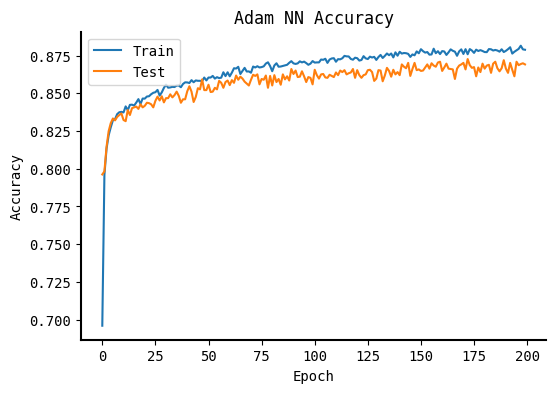

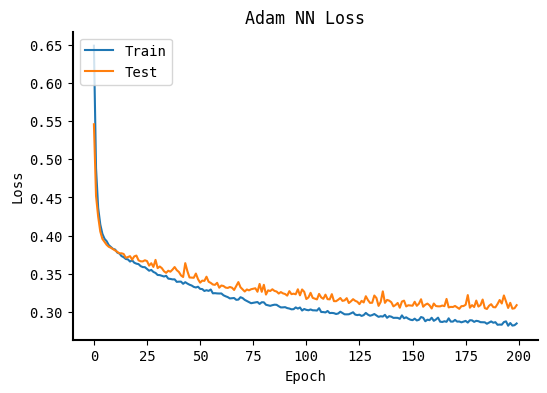

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Adam NN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Adam NN Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [47]:
def ml_nn(algorithm,node_list,max_iter,max_attempt,X_train,y_train,learning_rate,mutation,pop):
    if algorithm == 'genetic_alg':
        clf_hill = mlrose.NeuralNetwork(hidden_nodes = node_list, activation = 'relu',
                                algorithm = algorithm,
                                max_iters=max_iter, bias = True, is_classifier = True, random_state=42,
                                learning_rate = learning_rate, early_stopping = True, clip_max = 1e+2,
                                max_attempts = max_attempt,curve=True,mutation_prob=mutation,pop_size=pop)


    elif algorithm == 'random_hill_climb':
        clf_hill = mlrose.NeuralNetwork(hidden_nodes = node_list, activation = 'relu',
                                algorithm = algorithm,
                                max_iters=max_iter, bias = True, is_classifier = True, random_state=42,
                                learning_rate = learning_rate, early_stopping = True, clip_max = 1e+2,
                                max_attempts = max_attempt,curve=True,restarts=3)
    elif algorithm == 'simulated_annealing':
        clf_hill = mlrose.NeuralNetwork(hidden_nodes = node_list, activation = 'relu',
                                algorithm = algorithm,
                                max_iters=max_iter, bias = True, is_classifier = True, random_state=42,
                                learning_rate = learning_rate, early_stopping = True, clip_max = 1e+2,
                                max_attempts = max_attempt,curve=True)
    time_start = time.time()
    clf_hill.fit(X_train, y_train)
    fit_time = time.time()
    time_elapse = fit_time-time_start
    return clf_hill, time_elapse

In [48]:
def step_eval(step_size,algorithm,node_list,max_iter,max_attempt,X_train,y_train,mutation,pop):
    clf_hill, time_elapse = ml_nn(algorithm=algorithm,node_list=node_list,max_iter=max_iter,max_attempt=max_attempt,X_train=X_train,y_train=y_train,learning_rate=step_size,mutation=mutation,pop=pop)
    print(f'fit_time = {time_elapse}')
    train_pred = clf_hill.predict(X_train)
    print(np.unique(train_pred,return_counts=True))
    print('Train Report: ', classification_report(y_train, train_pred))
    print('Train Accuracy: ', accuracy_score(y_train, train_pred))
    test_pred = clf_hill.predict(X_test)
    print(np.unique(test_pred,return_counts=True))
    print('Test Accuracy: ', accuracy_score(y_test, test_pred))
    print('Test Report: ', classification_report(y_test, test_pred))
    if algorithm == 'genetic_alg':
        plt.plot(clf_hill.fitness_curve[:,0],label="Mutation: "+str(mutation))
    else:
        plt.plot(clf_hill.fitness_curve[:,0],label="Step Size: "+str(step_size))
    plt.legend()
    fig=plt.gcf()
    fig.set_size_inches(10,6)



In [49]:
def final_plot(plot_alg,step_list,algorithm,node_list,max_iter,max_attempt,X_train,y_train,mut_list,pop):
    if algorithm=='genetic_alg':
        for mut in mut_list:
            print(mut)
            step_eval(step_size=1,algorithm=algorithm,node_list=node_list,max_iter=max_iter,max_attempt=max_attempt,X_train=X_train,y_train=y_train,mutation=mut,pop=pop)
    else:
        for learning_rate in step_list:
            print(learning_rate)
            step_eval(step_size=learning_rate,algorithm=algorithm,node_list=node_list,max_iter=max_iter,max_attempt=max_attempt,X_train=X_train,y_train=y_train,mutation=0,pop=10)
    plt.xlabel("Epoch", fontsize=18)
    plt.ylabel("Loss", fontsize=18)
    plt.title(plot_alg+" NN Loss over Epochs")

0.3
fit_time = 381.86553144454956
(array([0, 1]), array([7539, 8201]))
Train Report:                precision    recall  f1-score   support

           0       0.81      0.77      0.79      7859
           1       0.78      0.82      0.80      7881

    accuracy                           0.80     15740
   macro avg       0.80      0.80      0.80     15740
weighted avg       0.80      0.80      0.80     15740

Train Accuracy:  0.7952986022871664
(array([0, 1]), array([1919, 2016]))
Test Accuracy:  0.7898348157560355
Test Report:                precision    recall  f1-score   support

           0       0.80      0.78      0.79      1982
           1       0.78      0.80      0.79      1953

    accuracy                           0.79      3935
   macro avg       0.79      0.79      0.79      3935
weighted avg       0.79      0.79      0.79      3935

0.4
fit_time = 382.73999524116516
(array([0, 1]), array([7779, 7961]))
Train Report:                precision    recall  f1-score   suppor

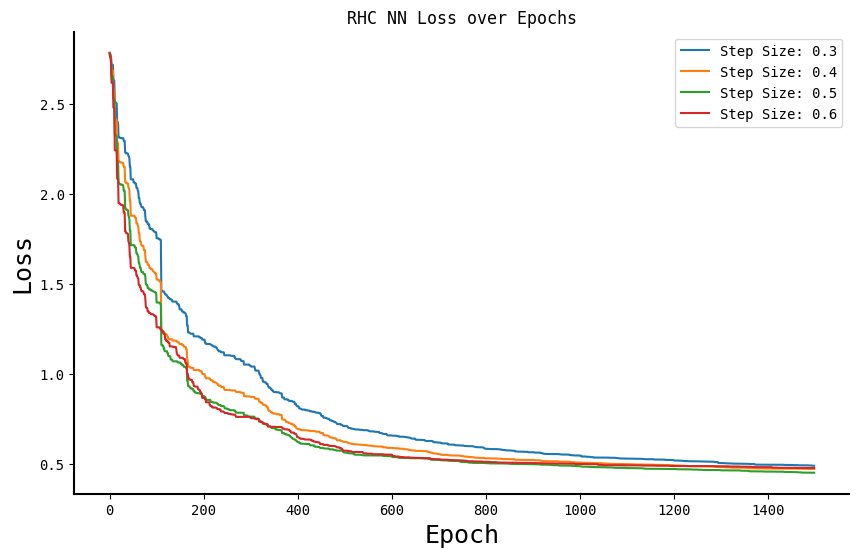

In [ ]:
final_plot(plot_alg='RHC',step_list=[0.3,0.4,0.5,0.6],algorithm='random_hill_climb',node_list=[32,16,8],max_iter=1500,max_attempt=1000,X_train=X_train,y_train=y_train,mut_list=0,pop=0)

0.36
fit_time = 75.13002443313599
(array([0, 1]), array([9981, 5759]))
Train Report:                precision    recall  f1-score   support

           0       0.44      0.56      0.49      7859
           1       0.40      0.29      0.34      7881

    accuracy                           0.43     15740
   macro avg       0.42      0.43      0.42     15740
weighted avg       0.42      0.43      0.42     15740

Train Accuracy:  0.4260482846251588
(array([0, 1]), array([2496, 1439]))
Test Accuracy:  0.4256670902160102
Test Report:                precision    recall  f1-score   support

           0       0.44      0.56      0.50      1982
           1       0.39      0.29      0.33      1953

    accuracy                           0.43      3935
   macro avg       0.42      0.42      0.41      3935
weighted avg       0.42      0.43      0.42      3935

0.38
fit_time = 115.38689613342285
(array([0, 1]), array([11678,  4062]))
Train Report:                precision    recall  f1-score   sup

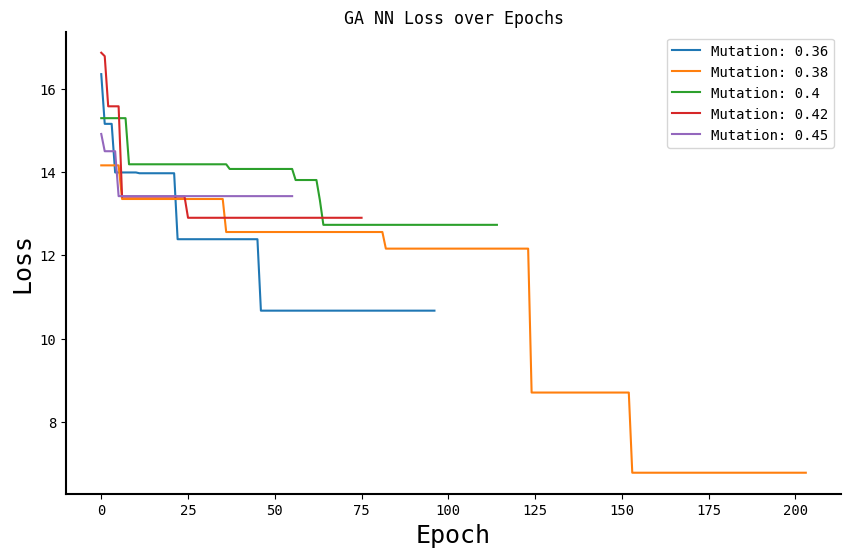

In [50]:
final_plot(plot_alg='GA',step_list=[1],algorithm='genetic_alg',node_list=[32,16,8],max_iter=500,max_attempt=50,X_train=X_train,y_train=y_train,mut_list=[0.36,0.38,0.4,0.42,0.45],pop=10)

0.35
fit_time = 130.44989585876465
(array([0, 1]), array([7560, 8180]))
Train Report:                precision    recall  f1-score   support

           0       0.78      0.75      0.76      7859
           1       0.76      0.78      0.77      7881

    accuracy                           0.76     15740
   macro avg       0.77      0.76      0.76     15740
weighted avg       0.77      0.76      0.76     15740

Train Accuracy:  0.764866581956798
(array([0, 1]), array([1955, 1980]))
Test Accuracy:  0.7634053367217281
Test Report:                precision    recall  f1-score   support

           0       0.77      0.76      0.76      1982
           1       0.76      0.77      0.76      1953

    accuracy                           0.76      3935
   macro avg       0.76      0.76      0.76      3935
weighted avg       0.76      0.76      0.76      3935

0.37
fit_time = 122.52108955383301
(array([0, 1]), array([6853, 8887]))
Train Report:                precision    recall  f1-score   suppo

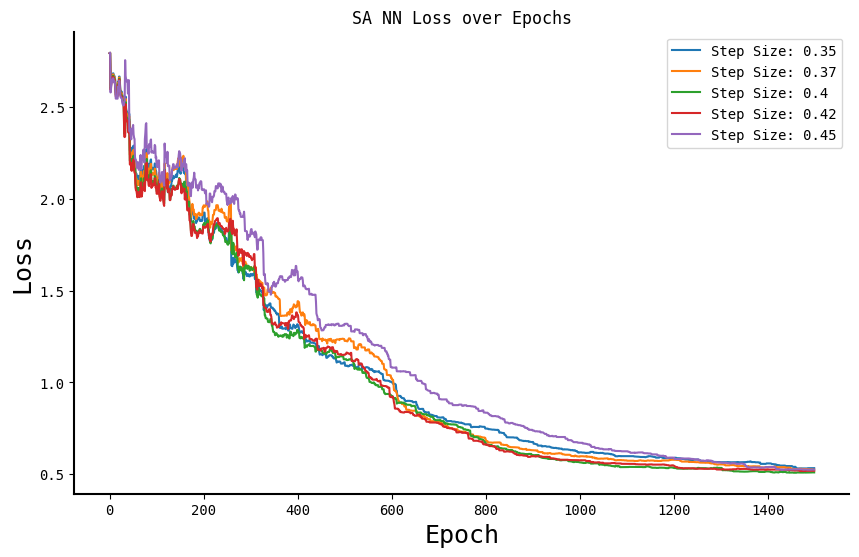

In [25]:
final_plot(plot_alg='SA',step_list=[0.35,0.37,0.4,0.42,0.45],algorithm='simulated_annealing',node_list=[32,16,8],max_iter=1500,max_attempt=1000,X_train=X_train,y_train=y_train,mut_list=0,pop=0)

# Random Optimization Problem Exploration

What are the randomized optimization (RO) algorithms I need to implement?

Randomized Hill Climbing (RHC)

Simulated Annealing (SA)

Genetic Algorithms (GA)

Mutual-Information-Maximizing Input Clustering (MIMIC)



You will then create (for sufficiently loose values of "create" including "steal", though it's fairly easy to come up with simple problems on your own in this case) three optimization problem domains. For the purpose of this assignment an "optimization problem" is just a fitness function one is trying to maximize (as opposed to a cost function one is trying to minimize). This choice doesn't make things easier or harder, but picking one over the other makes things easier for us to grade.

Please note that the problems you create should be over discrete-valued parameter spaces. Bit strings are preferable.

You will apply all four search techniques to these three optimization problems. The first problem should highlight advantages of your genetic algorithm, the second of simulated annealing, and the third of MIMIC. Be creative and thoughtful. It is not required that the problems be complicated or painful. They can be simple. For example, the 4-peaks and k-color problems are rather straightforward, but illustrate relative strengths rather neatly.



You will create or steal three optimization problems and run RHC, SA, GA, and MIMIC on your chosen optimization problems.

... with an additional constraint: Highlight each of GA, SA, and MIMIC in one of the respective optimization problems.

Hint: These optimization problems are available in the corresponding library you chose above. You'll need to experiment with various problems and choose the appropriate ones that highlight one of the respective algorithms.

Do I need to tune hyperparameters for every problem size?

That would be ideal.

# Function Evaluation Algorithms

In [ ]:
def rand_hill_eval(problem,size,rh_results,params):
    problem_fit = mlrose.DiscreteOpt(length = size,fitness_fn = problem,maximize = True,max_val = 2)
    grid_search = {}
    for att_val in params['max_attempts']:
        for iter_val in params['max_iter']:
                start=time.time()
                grid_result = mlrose.random_hill_climb(problem_fit,restarts=10*size,max_attempts=att_val,max_iters=size*iter_val,init_state=None,curve=True)
                end = time.time()
                grid_search[str(att_val)+"_"+str(iter_val)] = [size,end-start,grid_result[2][-1,0],grid_result[2][-1,1],grid_result[2][-1,1]/(end-start)]

    opt_param = list(grid_search.keys())[np.array([x[2] for x in grid_search.values()]).argmax()] # optimal parameters based on fitness values
    att_opt = int(opt_param.split("_")[0])
    iter_opt = int(opt_param.split("_")[1])
    start = time.time()
    random_hill_result = mlrose.random_hill_climb(problem_fit,restarts=10*size,max_attempts=att_opt,max_iters=size*iter_opt,init_state=None,curve=True)
    end=time.time()
    rh_results.append([size,end-start,random_hill_result[2][-1,0],random_hill_result[2][-1,1],random_hill_result[2][-1,1]/(end-start),opt_param])
    return rh_results,random_hill_result

In [ ]:
def gen_alg_eval(problem,size,ga_results,params):
    problem_fit = mlrose.DiscreteOpt(length = size,fitness_fn = problem,maximize = True,max_val = 2)
    grid_search = {}
    for pop_val in params['pop_size']:
        for mut_val in params['mutation_prob']:
              for att_val in params['max_attempts']:
                  start=time.time()
                  grid_result = mlrose.genetic_alg(problem_fit,pop_size=pop_val*size,mutation_prob=mut_val,max_attempts=att_val,max_iters=size*10,curve=True)
                  end = time.time()
                  grid_search[str(pop_val)+"_"+str(mut_val)+"_"+str(att_val)] = [size,end-start,grid_result[2][-1,0],grid_result[2][-1,1],grid_result[2][-1,1]/(end-start)]

    opt_param = list(grid_search.keys())[np.array([x[2] for x in grid_search.values()]).argmax()] # optimal parameters based on fitness values
    pop_opt = int(opt_param.split("_")[0])
    mut_opt = float(opt_param.split("_")[1])
    att_opt = int(opt_param.split("_")[2])
    start = time.time()
    gen_alg_result = mlrose.genetic_alg(problem_fit,pop_size=10*pop_opt,mutation_prob=mut_opt,max_attempts=att_opt,max_iters=size*10,curve=True)
    end=time.time()
    ga_results.append([size,end-start,gen_alg_result[2][-1,0],gen_alg_result[2][-1,1],gen_alg_result[2][-1,1]/(end-start),opt_param])
    return ga_results,gen_alg_result

In [ ]:
def sim_ann_eval(problem,size,sa_results,params):
    problem_fit = mlrose.DiscreteOpt(length = size,fitness_fn = problem,maximize = True,max_val = 2)
    grid_search = {}
    for att_val in params['max_attempts']:
        for iter_val in params['max_iter']:
                start=time.time()
                grid_result = mlrose.simulated_annealing(problem_fit,schedule=mlrose.GeomDecay(),max_attempts=att_val,init_state=None,max_iters=size*iter_val,curve=True)
                end = time.time()
                grid_search[str(att_val)+"_"+str(iter_val)] = [size,end-start,grid_result[2][-1,0],grid_result[2][-1,1],grid_result[2][-1,1]/(end-start)]

    opt_param = list(grid_search.keys())[np.array([x[2] for x in grid_search.values()]).argmax()] # optimal parameters based on fitness values
    att_opt = int(opt_param.split("_")[0])
    iter_opt = int(opt_param.split("_")[1])
    start = time.time()
    sim_ann_result = mlrose.simulated_annealing(problem_fit,schedule=mlrose.GeomDecay(),max_attempts=att_opt,init_state=None,max_iters=size*iter_opt,curve=True)
    end=time.time()
    sa_results.append([size,end-start,sim_ann_result[2][-1,0],sim_ann_result[2][-1,1],sim_ann_result[2][-1,1]/(end-start),opt_param])
    return sa_results,sim_ann_result

In [ ]:
def mimic_eval(problem,size,mim_results,params):
    problem_fit = mlrose.DiscreteOpt(length = size,fitness_fn = problem,maximize = True,max_val = 2)
    grid_search = {}
    for pop_val in params['pop_size']:
        for keep_val in params['keep_pct']:
                start=time.time()
                grid_result = mlrose.mimic(problem_fit,pop_size=pop_val*size, keep_pct=keep_val,max_attempts=10,max_iters=size*10,curve=True)
                end = time.time()
                grid_search[str(pop_val)+"_"+str(keep_val)] = [size,end-start,grid_result[2][-1,0],grid_result[2][-1,1],grid_result[2][-1,1]/(end-start)]

    opt_param = list(grid_search.keys())[np.array([x[2] for x in grid_search.values()]).argmax()] # optimal parameters based on fitness values
    pop_opt = int(opt_param.split("_")[0])
    keep_opt = float(opt_param.split("_")[1])
    start = time.time()
    mimic_result = mlrose.mimic(problem_fit,pop_size=pop_opt*size, keep_pct=keep_opt,max_attempts=10,max_iters=size*10,curve=True)
    end=time.time()
    mim_results.append([size,end-start,mimic_result[2][-1,0],mimic_result[2][-1,1],mimic_result[2][-1,1]/(end-start),opt_param])
    return mim_results, mimic_result

# Four Peaks Problem - MIMIC seems to perform best


In [ ]:
problem = mlrose.FourPeaks(t_pct=.5)

In [ ]:
rh_results = []
rh_params = {'max_attempts':[5,10,15,20,25],'max_iter':[2,5,10,15,20]}

for size in range(10,100,10):
    rh_results,cur_rh_result = rand_hill_eval(problem,size,rh_results,rh_params)

rh_results

[[10, 0.01113748550415039, 10.0, 73399.0, 6590266.71438969, '5_2'],
 [20, 0.2225656509399414, 18.0, 144474.0, 649129.8158087558, '10_5'],
 [30, 0.4525303840637207, 28.0, 186942.0, 413103.7529928084, '25_10'],
 [40, 0.9644057750701904, 31.0, 228536.0, 236970.7916601463, '25_5'],
 [50, 0.6775822639465332, 21.0, 258586.0, 381630.4141343413, '20_20'],
 [60, 1.0547709465026855, 19.0, 293895.0, 278633.954579874, '25_2'],
 [70, 0.6761198043823242, 15.0, 331027.0, 489598.1420074108, '20_2'],
 [80, 1.1118180751800537, 18.0, 376502.0, 338636.33664979524, '25_15'],
 [90, 0.4394974708557129, 14.0, 417546.0, 950053.2487411752, '25_10']]

In [ ]:
ga_results = []
ga_params = {'pop_size':[1,3,5],'mutation_prob':[0.1,0.2,0.3,0.35],'max_attempts':[10,15,20]}
for size in range(10,100,10):
    ga_results,cur_ga_result = gen_alg_eval(problem,size,ga_results,ga_params)

ga_results

[[10, 0.012335062026977539, 7.0, 243.0, 19699.941473220326, '1_0.1_15'],
 [20, 0.027118206024169922, 7.0, 553.0, 20392.204392396827, '1_0.2_20'],
 [30, 0.05352139472961426, 14.0, 511.0, 9547.583776198855, '1_0.35_20'],
 [40, 0.06842803955078125, 17.0, 1275.0, 18632.71267699855, '3_0.1_20'],
 [50, 0.025623559951782227, 3.0, 242.0, 9444.433187870442, '1_0.35_20'],
 [60, 0.01305699348449707, 9.0, 242.0, 18534.128877932988, '1_0.3_20'],
 [70, 0.040070295333862305, 13.0, 779.0, 19440.83500032725, '3_0.1_15'],
 [80, 0.018297195434570312, 5.0, 354.0, 19347.22735327843, '1_0.35_20'],
 [90, 0.06653666496276855, 14.0, 1216.0, 18275.637961121563, '3_0.1_10']]

In [ ]:
sa_results = []
sa_params = {'max_attempts':[5,10,15,20,25,30],'max_iter':[5,10,15,20]}
for size in range(10,100,10):
    sa_results,cur_sa_result = sim_ann_eval(problem,size,sa_results,sa_params)

sa_results

[[10, 0.0004184246063232422, 7.0, 30.0, 71697.50427350428, '5_10'],
 [20, 0.0021677017211914062, 11.0, 170.0, 78424.07391113066, '5_20'],
 [30, 0.012269973754882812, 30.0, 898.0, 73186.79061091249, '20_20'],
 [40, 0.00836324691772461, 40.0, 653.0, 78079.72267518102, '25_20'],
 [50, 0.04605555534362793, 31.0, 1243.0, 26989.14367063379, '30_15'],
 [60, 0.04410815238952637, 47.0, 1874.0, 42486.476954427766, '25_20'],
 [70, 0.057289838790893555, 32.0, 2460.0, 42939.55179345044, '15_20'],
 [80, 0.07885289192199707, 53.0, 2529.0, 32072.381092905758, '10_20'],
 [90, 0.03159213066101074, 43.0, 2424.0, 76727.96830356133, '25_15']]

In [ ]:
# run time of over one hour
mim_results = []
mim_params = {'pop_size':[5,10,15],'keep_pct':[0.1,0.2,0.3]}
for size in range(10,100,10):
    mim_results,cur_mim_result = mimic_eval(problem,size,mim_results,mim_params)

mim_results

[[10, 0.5457017421722412, 8.0, 664.0, 1216.781895100529, '5_0.2'],
 [20, 3.2963309288024902, 20.0, 1719.0, 521.488903004192, '5_0.3'],
 [30, 14.540767669677734, 30.0, 13540.0, 931.1750457464042, '15_0.3'],
 [40, 17.860804557800293, 34.0, 12627.0, 706.9670327076867, '15_0.1'],
 [50, 46.16996693611145, 33.0, 24041.0, 520.706459098556, '15_0.2'],
 [60, 47.4425003528595, 36.0, 18929.0, 398.98824596539407, '15_0.1'],
 [70, 60.53600525856018, 41.0, 16130.0, 266.4529965448804, '10_0.1'],
 [80, 107.36539816856384, 50.0, 37245.0, 346.89947259847435, '15_0.1'],
 [90, 174.0786862373352, 86.0, 55410.0, 318.3043323549396, '15_0.1']]

# Plots

<Axes: title={'center': 'Wall Clock Time vs Problem Size'}, xlabel='Problem Size', ylabel='Wall Clock Time (seconds)'>

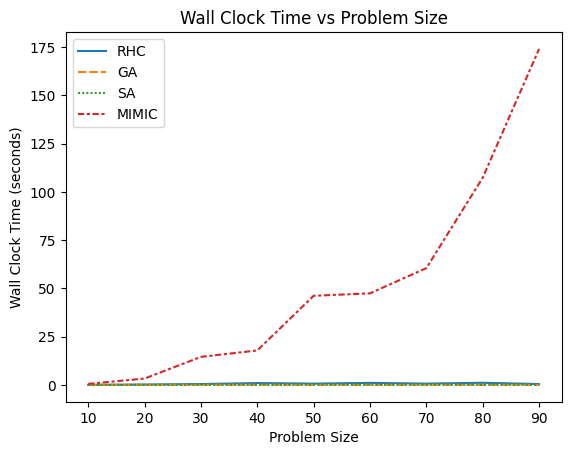

In [ ]:
# Wall Clock Time: Our favorite. Look into it.
import seaborn as sns
time_df = pd.concat([pd.DataFrame(rh_results)[1], pd.DataFrame(ga_results)[1],pd.DataFrame(sa_results)[1],pd.DataFrame(mim_results)[1]], ignore_index=True, axis=1)
time_df.index=pd.DataFrame(rh_results)[0]
time_df.columns = ["RHC","GA","SA","MIMIC"]
time_plt = sns.lineplot(data=time_df)
time_plt.set_title('Wall Clock Time vs Problem Size')
time_plt.set_xlabel('Problem Size')
time_plt.set_ylabel('Wall Clock Time (seconds)')
time_plt

<Axes: title={'center': 'Wall Clock Time vs Problem Size'}, xlabel='Problem Size', ylabel='Wall Clock Time (seconds)'>

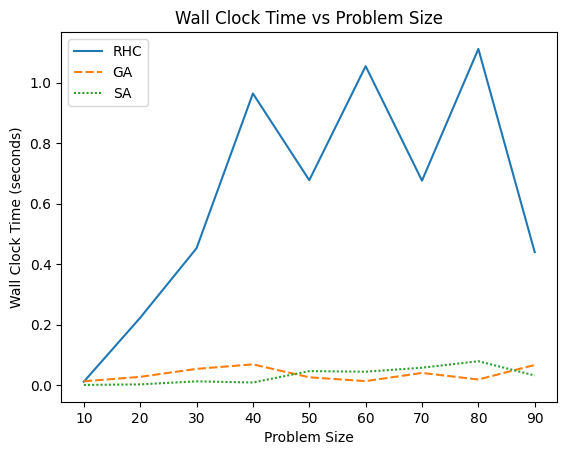

In [ ]:
# Wall Clock Time: Our favorite. Look into it.
import seaborn as sns
time_df = pd.concat([pd.DataFrame(rh_results)[1], pd.DataFrame(ga_results)[1],pd.DataFrame(sa_results)[1]], ignore_index=True, axis=1)
time_df.index=pd.DataFrame(rh_results)[0]
time_df.columns = ["RHC","GA","SA"]
time_plt = sns.lineplot(data=time_df)
time_plt.set_title('Wall Clock Time vs Problem Size')
time_plt.set_xlabel('Problem Size')
time_plt.set_ylabel('Wall Clock Time (seconds)')
time_plt

<Axes: title={'center': 'Fitness Value vs Problem Size'}, xlabel='Problem Size', ylabel='Fitness Value'>

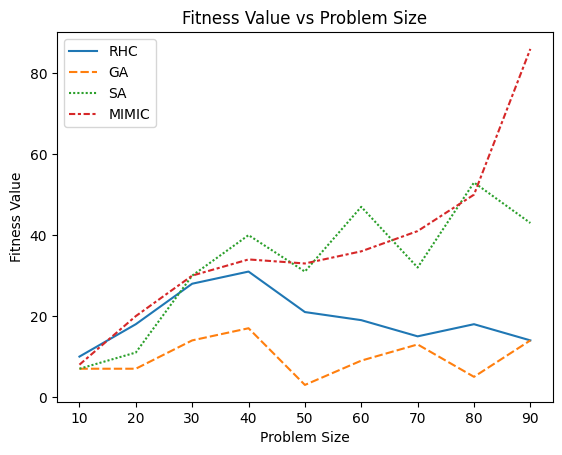

In [ ]:
# Fitness / Problem Size: Focusing on a single problem size can misrepresent how well an algorithm is actually doing. To counteract this, try multiple problem sizes.

fitness_df = pd.concat([pd.DataFrame(rh_results)[2], pd.DataFrame(ga_results)[2],pd.DataFrame(sa_results)[2],pd.DataFrame(mim_results)[2]], ignore_index=True, axis=1)
fitness_df.index=pd.DataFrame(rh_results)[0]
fitness_df.columns = ["RHC","GA","SA","MIMIC"]
fitness_plt = sns.lineplot(data=fitness_df)
fitness_plt.set_title('Fitness Value vs Problem Size')
fitness_plt.set_xlabel('Problem Size')
fitness_plt.set_ylabel('Fitness Value')
fitness_plt

<Axes: title={'center': 'Function Evaluations vs Problem Size'}, xlabel='Problem Size', ylabel='Function Evaluations'>

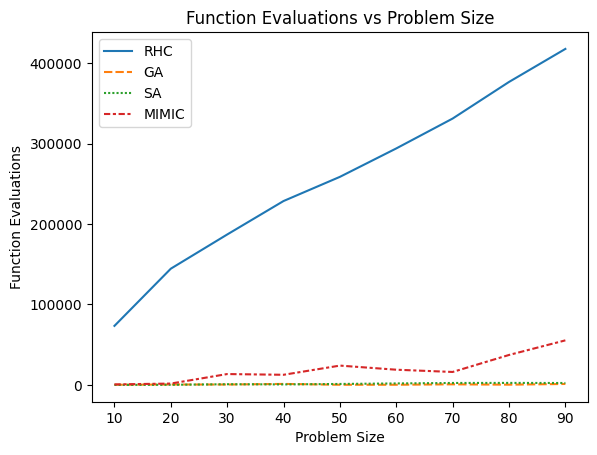

In [ ]:
# Function Evaluations: There's many ways to interpret fevals.
# Some students will focus on fevals / wall clock times, or fevals / iterations, etc.
# The real requirement is that you somehow look at fevals. Keep in mind that some algorithms may take significantly less iterations but each iteration may take significantly longer.

fevals_df = pd.concat([pd.DataFrame(rh_results)[3], pd.DataFrame(ga_results)[3],pd.DataFrame(sa_results)[3],pd.DataFrame(mim_results)[3]], ignore_index=True, axis=1)
fevals_df.index=pd.DataFrame(rh_results)[0]
fevals_df.columns = ["RHC","GA","SA","MIMIC"]
fevals_plt = sns.lineplot(data=fevals_df)
fevals_plt.set_title('Function Evaluations vs Problem Size')
fevals_plt.set_xlabel('Problem Size')
fevals_plt.set_ylabel('Function Evaluations')
fevals_plt

<Axes: title={'center': 'Function Evaluations per Second vs Problem Size'}, xlabel='Problem Size', ylabel='Function Evaluations per Second'>

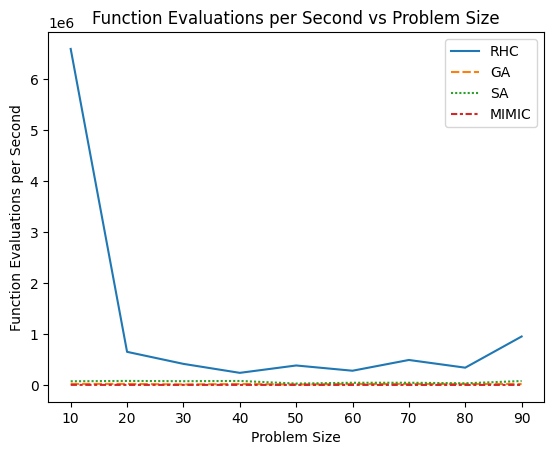

In [ ]:

fevals_sec_df = pd.concat([pd.DataFrame(rh_results)[4], pd.DataFrame(ga_results)[4],pd.DataFrame(sa_results)[4],pd.DataFrame(mim_results)[4]], ignore_index=True, axis=1)
fevals_sec_df.index=pd.DataFrame(rh_results)[0]
fevals_sec_df.columns = ["RHC","GA","SA","MIMIC"]
fevals_sec_plt = sns.lineplot(data=fevals_sec_df)
fevals_sec_plt.set_title('Function Evaluations per Second vs Problem Size')
fevals_sec_plt.set_xlabel('Problem Size')
fevals_sec_plt.set_ylabel('Function Evaluations per Second')
fevals_sec_plt

<Axes: title={'center': 'Fitness Values over Iterations'}, xlabel='Iterations', ylabel='Fitness Values'>

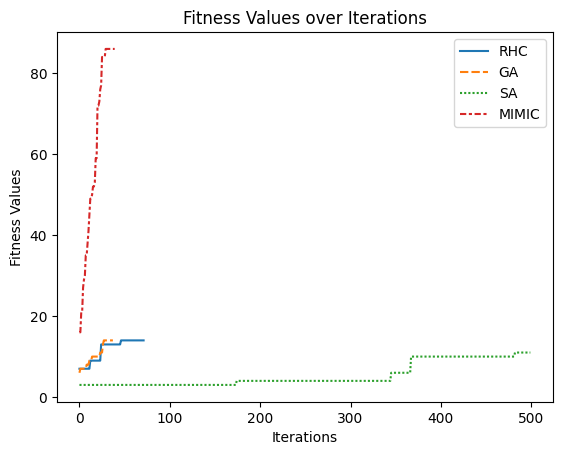

In [ ]:
# Fitness / Iteration: Since we're dealing with optimization problems, those problems will present access to a fitness score at each iteration.

fit_iter_df = pd.concat([pd.DataFrame(cur_rh_result[2][:,0]),pd.DataFrame(cur_ga_result[2][:,0]),pd.DataFrame(cur_sa_result[2][:500,0]),pd.DataFrame(cur_mim_result[2][:,0])], ignore_index=True, axis=1)
fit_iter_df.columns = ["RHC","GA","SA","MIMIC"]
fit_iter_plt = sns.lineplot(data=fit_iter_df)
fit_iter_plt.set_title('Fitness Values over Iterations')
fit_iter_plt.set_xlabel('Iterations')
fit_iter_plt.set_ylabel('Fitness Values')
fit_iter_plt

<Axes: title={'center': 'Fitness Values over Iterations'}, xlabel='Iterations', ylabel='Fitness Values'>

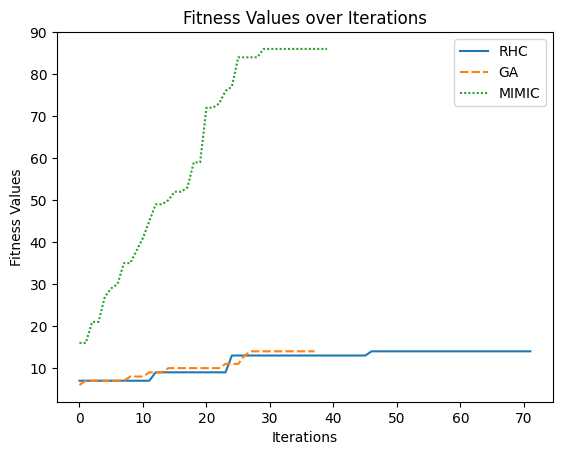

In [ ]:
fit_iter_df = pd.concat([pd.DataFrame(cur_rh_result[2][:,0]),pd.DataFrame(cur_ga_result[2][:,0]),pd.DataFrame(cur_mim_result[2][:,0])], ignore_index=True, axis=1)
fit_iter_df.columns = ["RHC","GA","MIMIC"]
fit_iter_plt = sns.lineplot(data=fit_iter_df)
fit_iter_plt.set_title('Fitness Values over Iterations')
fit_iter_plt.set_xlabel('Iterations')
fit_iter_plt.set_ylabel('Fitness Values')
fit_iter_plt

# Knapsack Problem - GA seems to perform best

In [ ]:
rh_results = []
rh_params = {'max_attempts':[5,10,15,20,25],'max_iter':[2,5,10,15,20]}
for size in range(10,100,10):
    weights= np.random.uniform(low=0.1, high=1, size=(size,))
    values= np.random.uniform(low=1, high=size, size=(size,))
    problem = mlrose.Knapsack(weights, values)
    rh_results,cur_rh_result = rand_hill_eval(problem,size,rh_results,rh_params)

rh_results

[[10,
  0.01629805564880371,
  35.440526634124936,
  46236.0,
  2836902.818121974,
  '5_2'],
 [20,
  0.07210564613342285,
  136.20347507364986,
  88230.0,
  1223621.2381585343,
  '15_2'],
 [30,
  0.16709303855895996,
  226.22042385347626,
  125517.0,
  751180.3069863407,
  '25_15'],
 [40,
  0.12893962860107422,
  413.6980164305046,
  160125.0,
  1241860.25458015,
  '15_15'],
 [50,
  0.21400022506713867,
  526.0813025454457,
  201835.0,
  943153.2136785274,
  '20_15'],
 [60,
  0.3264775276184082,
  822.2310136388002,
  250019.0,
  765807.6861333805,
  '25_2'],
 [70,
  0.38932156562805176,
  1160.204583854097,
  282312.0,
  725138.3558590586,
  '20_10'],
 [80,
  0.26781392097473145,
  1443.8108955447622,
  306808.0,
  1145601.389514579,
  '15_15'],
 [90,
  0.3014521598815918,
  1777.6011747426605,
  348664.0,
  1156614.701772091,
  '15_20']]

In [ ]:
ga_results = []
ga_params = {'pop_size':[1,3,5],'mutation_prob':[0.1,0.2,0.3,0.35],'max_attempts':[10,15,20]}
for size in range(10,100,10):
    weights= np.random.uniform(low=0.1, high=1, size=(size,))
    values= np.random.uniform(low=1, high=size, size=(size,))
    problem = mlrose.Knapsack(weights, values)
    ga_results,cur_ga_result = gen_alg_eval(problem,size,ga_results,ga_params)

ga_results

[[10,
  0.010200023651123047,
  29.401981857355732,
  199.0,
  19509.758683558506,
  '1_0.1_15'],
 [20,
  0.042961835861206055,
  102.59587342190311,
  809.0,
  18830.66642248675,
  '1_0.1_15'],
 [30,
  0.025941133499145508,
  221.57583867639417,
  462.0,
  17809.553310969164,
  '1_0.3_15'],
 [40,
  0.28670763969421387,
  358.5121296973562,
  2895.0,
  10097.393997200923,
  '3_0.1_15'],
 [50,
  0.0742044448852539,
  758.2180130446927,
  1314.0,
  17707.834106594353,
  '3_0.1_10'],
 [60,
  0.1396322250366211,
  1086.0704523863449,
  2306.0,
  16514.812389440973,
  '5_0.2_10'],
 [70,
  0.3417031764984131,
  1461.6384159735155,
  5553.0,
  16250.94638248348,
  '3_0.35_15'],
 [80,
  0.42555856704711914,
  2182.7203231047147,
  6351.0,
  14923.915276970087,
  '5_0.3_20'],
 [90,
  0.2832458019256592,
  2149.1234097955744,
  4407.0,
  15558.924333701734,
  '3_0.2_20']]

In [ ]:
sa_results = []
sa_params = {'max_attempts':[5,10,15,20,25,30],'max_iter':[5,10,15,20]}
for size in range(10,100,10):
    weights= np.random.uniform(low=0.1, high=1, size=(size,))
    values= np.random.uniform(low=1, high=size, size=(size,))
    problem = mlrose.Knapsack(weights, values)
    sa_results,cur_sa_result = sim_ann_eval(problem,size,sa_results,sa_params)

sa_results

[[10,
  0.0030908584594726562,
  25.598945795822644,
  63.0,
  20382.686825053996,
  '5_5'],
 [20,
  0.003123044967651367,
  91.2823501714953,
  59.0,
  18891.818917474615,
  '30_10'],
 [30,
  0.0023505687713623047,
  172.31870778859764,
  119.0,
  50626.04483213308,
  '15_5'],
 [40,
  0.0008814334869384766,
  301.6004179240419,
  41.0,
  46515.13767919935,
  '15_10'],
 [50,
  0.0011301040649414062,
  415.0733329600162,
  45.0,
  39819.3417721519,
  '15_15'],
 [60,
  0.017292261123657227,
  703.106830492648,
  546.0,
  31574.818127921244,
  '30_10'],
 [70,
  0.008626222610473633,
  906.3825153143226,
  389.0,
  45095.05696359968,
  '5_15'],
 [80, 0.0442047119140625, 0.0, 2400.0, 54292.85467725233, '30_15'],
 [90,
  0.02413201332092285,
  1623.4024560600537,
  1212.0,
  50223.74154539257,
  '10_15']]

In [ ]:
# Note: A single run with pop 10 and keep 0.2 took 13 min
mim_results = []
mim_params = {'pop_size':[5,10,20],'keep_pct':[0.1,0.2]}
for size in range(10,100,10):
    weights= np.random.uniform(low=0.1, high=1, size=(size,))
    values= np.random.uniform(low=1, high=size, size=(size,))
    problem = mlrose.Knapsack(weights, values)
    mim_results,cur_mim_result = mimic_eval(problem,size,mim_results,mim_params)

mim_results

[[10,
  0.48996901512145996,
  35.07716635451223,
  612.0,
  1249.0585753637695,
  '5_0.2'],
 [20,
  2.0650761127471924,
  111.97654376428686,
  1212.0,
  586.9033071074865,
  '5_0.1'],
 [30,
  6.5658299922943115,
  287.0265790088505,
  9620.0,
  1465.1612989203309,
  '20_0.1'],
 [40,
  12.739609479904175,
  449.5036019292562,
  3217.0,
  252.51951443838118,
  '5_0.1'],
 [50,
  33.09459590911865,
  573.7765584374569,
  22023.0,
  665.4560781004109,
  '20_0.2'],
 [60,
  79.45580530166626,
  837.9360129088196,
  43240.0,
  544.2018973419582,
  '20_0.1'],
 [70,
  76.8584532737732,
  1100.7945260683832,
  35028.0,
  455.74687634200393,
  '20_0.1'],
 [80,
  51.824016094207764,
  1352.3960768357247,
  11216.0,
  216.42475526426026,
  '10_0.1'],
 [90,
  67.88459730148315,
  1944.8130959242114,
  12615.0,
  185.83007783010572,
  '10_0.2']]

# Plots

<Axes: title={'center': 'Wall Clock Time vs Problem Size'}, xlabel='Problem Size', ylabel='Wall Clock Time (seconds)'>

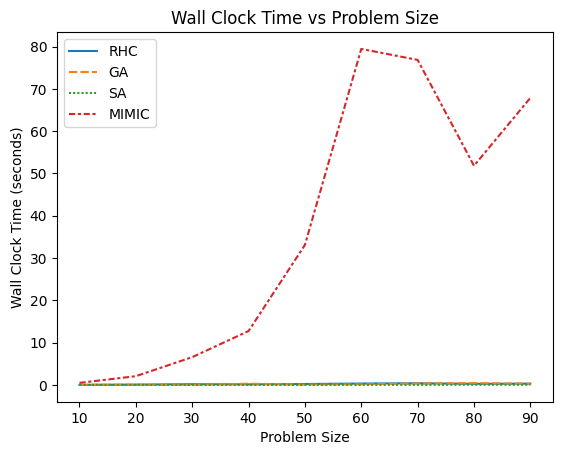

In [ ]:
# Wall Clock Time: Our favorite. Look into it.
import seaborn as sns
time_df = pd.concat([pd.DataFrame(rh_results)[1], pd.DataFrame(ga_results)[1],pd.DataFrame(sa_results)[1],pd.DataFrame(mim_results)[1]], ignore_index=True, axis=1)
time_df.index=pd.DataFrame(rh_results)[0]
time_df.columns = ["RHC","GA","SA","MIMIC"]
time_plt = sns.lineplot(data=time_df)
time_plt.set_title('Wall Clock Time vs Problem Size')
time_plt.set_xlabel('Problem Size')
time_plt.set_ylabel('Wall Clock Time (seconds)')
time_plt

<Axes: title={'center': 'Wall Clock Time vs Problem Size'}, xlabel='Problem Size', ylabel='Wall Clock Time (seconds)'>

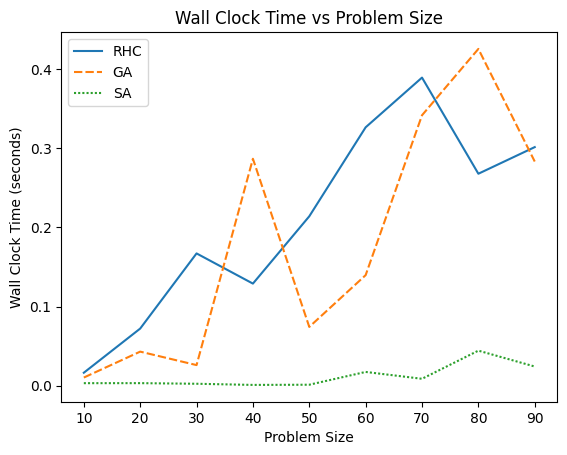

In [ ]:
# Wall Clock Time: Our favorite. Look into it.
import seaborn as sns
time_df = pd.concat([pd.DataFrame(rh_results)[1], pd.DataFrame(ga_results)[1],pd.DataFrame(sa_results)[1]], ignore_index=True, axis=1)
time_df.index=pd.DataFrame(rh_results)[0]
time_df.columns = ["RHC","GA","SA"]
time_plt = sns.lineplot(data=time_df)
time_plt.set_title('Wall Clock Time vs Problem Size')
time_plt.set_xlabel('Problem Size')
time_plt.set_ylabel('Wall Clock Time (seconds)')
time_plt

<Axes: title={'center': 'Fitness Value vs Problem Size'}, xlabel='Problem Size', ylabel='Fitness Value'>

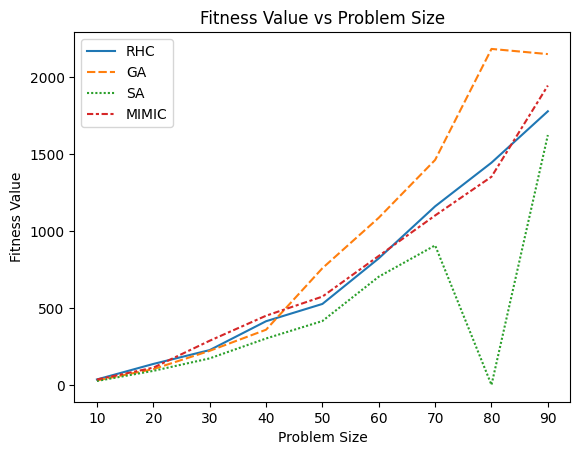

In [ ]:
# Fitness / Problem Size: Focusing on a single problem size can misrepresent how well an algorithm is actually doing. To counteract this, try multiple problem sizes.

fitness_df = pd.concat([pd.DataFrame(rh_results)[2], pd.DataFrame(ga_results)[2],pd.DataFrame(sa_results)[2],pd.DataFrame(mim_results)[2]], ignore_index=True, axis=1)
fitness_df.index=pd.DataFrame(rh_results)[0]
fitness_df.columns = ["RHC","GA","SA","MIMIC"]
fitness_plt = sns.lineplot(data=fitness_df)
fitness_plt.set_title('Fitness Value vs Problem Size')
fitness_plt.set_xlabel('Problem Size')
fitness_plt.set_ylabel('Fitness Value')
fitness_plt

<Axes: title={'center': 'Function Evaluations vs Problem Size'}, xlabel='Problem Size', ylabel='Function Evaluations'>

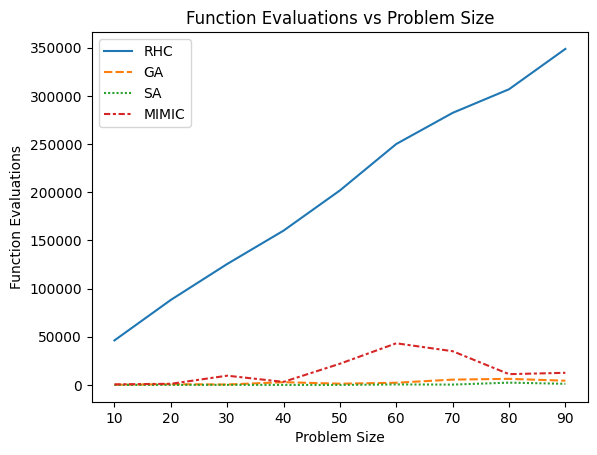

In [ ]:
# Function Evaluations: There's many ways to interpret fevals.
# Some students will focus on fevals / wall clock times, or fevals / iterations, etc.
# The real requirement is that you somehow look at fevals. Keep in mind that some algorithms may take significantly less iterations but each iteration may take significantly longer.

fevals_df = pd.concat([pd.DataFrame(rh_results)[3], pd.DataFrame(ga_results)[3],pd.DataFrame(sa_results)[3],pd.DataFrame(mim_results)[3]], ignore_index=True, axis=1)
fevals_df.index=pd.DataFrame(rh_results)[0]
fevals_df.columns = ["RHC","GA","SA","MIMIC"]
fevals_plt = sns.lineplot(data=fevals_df)
fevals_plt.set_title('Function Evaluations vs Problem Size')
fevals_plt.set_xlabel('Problem Size')
fevals_plt.set_ylabel('Function Evaluations')
fevals_plt

<Axes: title={'center': 'Function Evaluations per Second vs Problem Size'}, xlabel='Problem Size', ylabel='Function Evaluations per Second'>

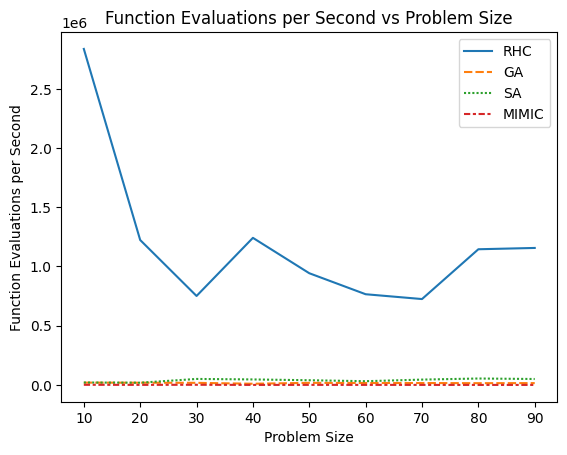

In [ ]:

fevals_sec_df = pd.concat([pd.DataFrame(rh_results)[4], pd.DataFrame(ga_results)[4],pd.DataFrame(sa_results)[4],pd.DataFrame(mim_results)[4]], ignore_index=True, axis=1)
fevals_sec_df.index=pd.DataFrame(rh_results)[0]
fevals_sec_df.columns = ["RHC","GA","SA","MIMIC"]
fevals_sec_plt = sns.lineplot(data=fevals_sec_df)
fevals_sec_plt.set_title('Function Evaluations per Second vs Problem Size')
fevals_sec_plt.set_xlabel('Problem Size')
fevals_sec_plt.set_ylabel('Function Evaluations per Second')
fevals_sec_plt

<Axes: title={'center': 'Fitness Values over Iterations'}, xlabel='Iterations', ylabel='Fitness Values'>

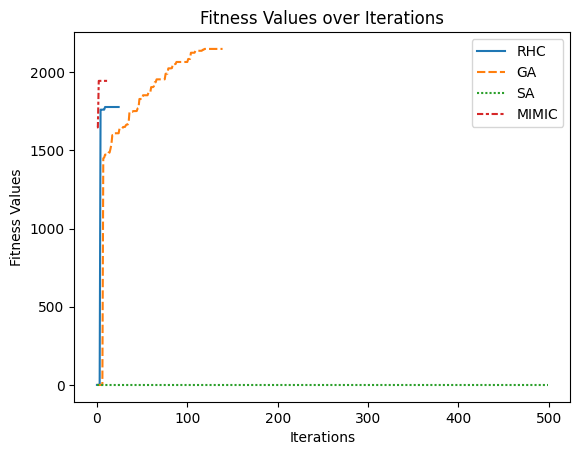

In [ ]:
# Fitness / Iteration: Since we're dealing with optimization problems, those problems will present access to a fitness score at each iteration.

fit_iter_df = pd.concat([pd.DataFrame(cur_rh_result[2][:,0]),pd.DataFrame(cur_ga_result[2][:,0]),pd.DataFrame(cur_sa_result[2][:500,0]),pd.DataFrame(cur_mim_result[2][:,0])], ignore_index=True, axis=1)
fit_iter_df.columns = ["RHC","GA","SA","MIMIC"]
fit_iter_plt = sns.lineplot(data=fit_iter_df)
fit_iter_plt.set_title('Fitness Values over Iterations')
fit_iter_plt.set_xlabel('Iterations')
fit_iter_plt.set_ylabel('Fitness Values')
fit_iter_plt

# OneMax - SA close on fitness, far better on time

In [ ]:
problem = mlrose.OneMax()

In [ ]:
rh_results = []
rh_params = {'max_attempts':[5,10,15,20,25],'max_iter':[2,5,10,15,20]}
for size in range(10,100,10):
    rh_results,cur_rh_result = rand_hill_eval(problem,size,rh_results,rh_params)

rh_results

[[10, 0.021956205368041992, 10.0, 80309.0, 3657690.327350121, '5_2'],
 [20, 0.10724568367004395, 20.0, 251691.0, 2346863.681473297, '5_2'],
 [30, 0.11293578147888184, 30.0, 498930.0, 4417820.406133164, '5_2'],
 [40, 0.7360935211181641, 39.0, 811448.0, 1102370.794905746, '10_2'],
 [50, 0.8623788356781006, 50.0, 1207067.0, 1399694.6006343793, '10_2'],
 [60, 0.9543766975402832, 59.0, 1651745.0, 1730705.5005188677, '10_20'],
 [70, 1.1396033763885498, 70.0, 2142375.0, 1879930.3726084726, '10_15'],
 [80, 2.658521890640259, 79.0, 2695431.0, 1013883.3197084762, '15_2'],
 [90, 3.4892237186431885, 89.0, 3346942.0, 959222.5291021133, '15_20']]

In [ ]:
ga_results = []
ga_params = {'pop_size':[1,3,5],'mutation_prob':[0.1,0.2,0.3,0.35],'max_attempts':[10,15,20]}
for size in range(10,100,10):
    ga_results,cur_ga_result = gen_alg_eval(problem,size,ga_results,ga_params)

ga_results

[[10, 0.010168075561523438, 10.0, 199.0, 19571.058338022885, '1_0.1_15'],
 [20, 0.015811443328857422, 19.0, 301.0, 19036.845260713533, '1_0.1_10'],
 [30, 0.018310070037841797, 25.0, 291.0, 15892.893877444725, '1_0.1_10'],
 [40, 0.029522180557250977, 36.0, 516.0, 17478.38371895821, '1_0.1_10'],
 [50, 0.020123720169067383, 40.0, 358.0, 17789.951211421125, '1_0.1_10'],
 [60, 0.07655096054077148, 52.0, 804.0, 10502.807467344384, '1_0.1_15'],
 [70, 0.02082061767578125, 49.0, 413.0, 19836.106998900697, '1_0.1_10'],
 [80, 0.027111530303955078, 61.0, 517.0, 19069.37727984241, '1_0.1_10'],
 [90, 0.02874302864074707, 66.0, 558.0, 19413.403054156955, '1_0.1_10']]

In [ ]:
sa_results = []
sa_params = {'max_attempts':[5,10,15,20,25,30,50,75,100],'max_iter':[5,10,15,20,25,30,40,50]}
for size in range(10,100,10):
    sa_results,cur_sa_result = sim_ann_eval(problem,size,sa_results,sa_params)

sa_results

[[10, 0.004492521286010742, 9.0, 139.0, 30940.309717136337, '10_10'],
 [20, 0.0035538673400878906, 16.0, 97.0, 27294.209580034887, '10_10'],
 [30, 0.003453493118286133, 25.0, 106.0, 30693.560510873318, '10_10'],
 [40, 0.005349397659301758, 39.0, 247.0, 46173.422828363866, '25_10'],
 [50, 0.01023411750793457, 48.0, 229.0, 22376.135492137448, '20_50'],
 [60, 0.004182577133178711, 54.0, 210.0, 50208.279085675196, '15_5'],
 [70, 0.0037190914154052734, 66.0, 221.0, 59423.11584075903, '15_20'],
 [80, 0.003467559814453125, 73.0, 208.0, 59984.54565456546, '30_10'],
 [90, 0.013490438461303711, 85.0, 301.0, 22312.099111040417, '30_50']]

In [ ]:
mim_results = []
mim_params = {'pop_size':[5,10],'keep_pct':[0.1,0.2]}
for size in range(10,100,10):
    mim_results,cur_mim_result = mimic_eval(problem,size,mim_results,mim_params)

mim_results

[[10, 0.7853608131408691, 10.0, 612.0, 779.2596597128999, '5_0.2'],
 [20, 3.1779346466064453, 20.0, 1314.0, 413.4760925317183, '5_0.1'],
 [30, 5.998310804367065, 30.0, 2268.0, 378.1064492938219, '5_0.1'],
 [40, 11.573586225509644, 40.0, 3018.0, 260.7661913252046, '5_0.1'],
 [50, 18.652685165405273, 50.0, 3768.0, 202.00844900274342, '5_0.1'],
 [60, 30.290924549102783, 60.0, 5122.0, 169.09355116239638, '5_0.1'],
 [70, 39.04674291610718, 70.0, 5620.0, 143.93005870104707, '5_0.1'],
 [80, 55.395150899887085, 80.0, 6821.0, 123.13352142188863, '5_0.1'],
 [90, 73.36654591560364, 90.0, 8124.0, 110.73166793684618, '5_0.1']]

# Plots

<Axes: title={'center': 'Wall Clock Time vs Problem Size'}, xlabel='Problem Size', ylabel='Wall Clock Time (seconds)'>

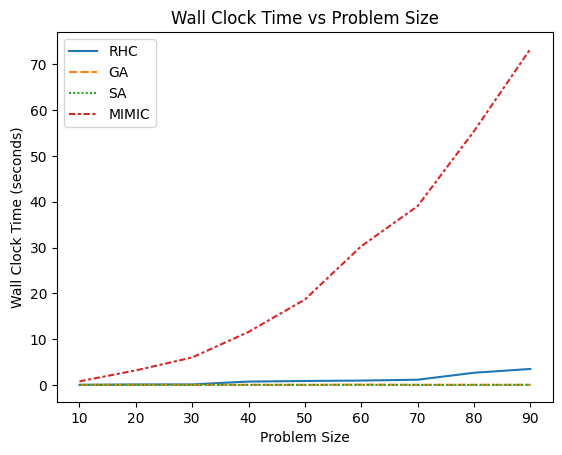

In [ ]:
# Wall Clock Time: Our favorite. Look into it.
import seaborn as sns
time_df = pd.concat([pd.DataFrame(rh_results)[1], pd.DataFrame(ga_results)[1],pd.DataFrame(sa_results)[1],pd.DataFrame(mim_results)[1]], ignore_index=True, axis=1)
time_df.index=pd.DataFrame(rh_results)[0]
time_df.columns = ["RHC","GA","SA","MIMIC"]
time_plt = sns.lineplot(data=time_df)
time_plt.set_title('Wall Clock Time vs Problem Size')
time_plt.set_xlabel('Problem Size')
time_plt.set_ylabel('Wall Clock Time (seconds)')
time_plt

<Axes: title={'center': 'Wall Clock Time vs Problem Size'}, xlabel='Problem Size', ylabel='Wall Clock Time (seconds)'>

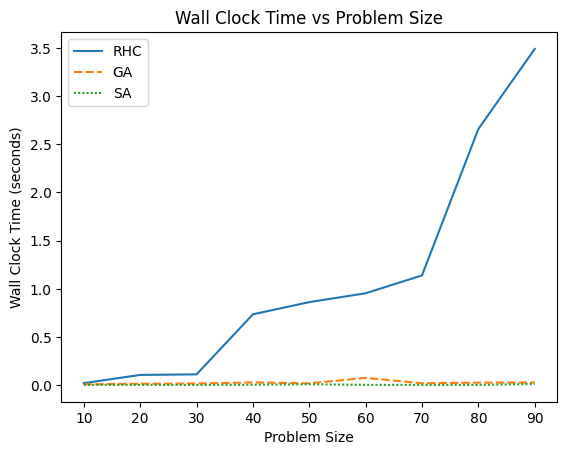

In [ ]:
# Wall Clock Time: Our favorite. Look into it.
import seaborn as sns
time_df = pd.concat([pd.DataFrame(rh_results)[1], pd.DataFrame(ga_results)[1],pd.DataFrame(sa_results)[1]], ignore_index=True, axis=1)
time_df.index=pd.DataFrame(rh_results)[0]
time_df.columns = ["RHC","GA","SA"]
time_plt = sns.lineplot(data=time_df)
time_plt.set_title('Wall Clock Time vs Problem Size')
time_plt.set_xlabel('Problem Size')
time_plt.set_ylabel('Wall Clock Time (seconds)')
time_plt

<Axes: title={'center': 'Fitness Value vs Problem Size'}, xlabel='Problem Size', ylabel='Fitness Value'>

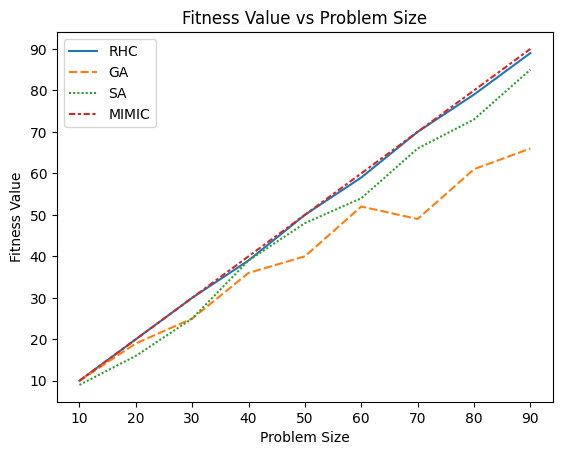

In [ ]:
# Fitness / Problem Size: Focusing on a single problem size can misrepresent how well an algorithm is actually doing. To counteract this, try multiple problem sizes.

fitness_df = pd.concat([pd.DataFrame(rh_results)[2], pd.DataFrame(ga_results)[2],pd.DataFrame(sa_results)[2],pd.DataFrame(mim_results)[2]], ignore_index=True, axis=1)
fitness_df.index=pd.DataFrame(rh_results)[0]
fitness_df.columns = ["RHC","GA","SA","MIMIC"]
fitness_plt = sns.lineplot(data=fitness_df)
fitness_plt.set_title('Fitness Value vs Problem Size')
fitness_plt.set_xlabel('Problem Size')
fitness_plt.set_ylabel('Fitness Value')
fitness_plt

<Axes: title={'center': 'Function Evaluations vs Problem Size'}, xlabel='Problem Size', ylabel='Function Evaluations'>

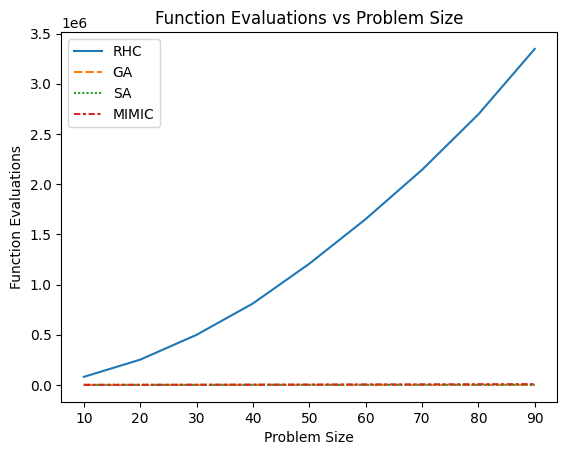

In [ ]:
# Function Evaluations: There's many ways to interpret fevals.
# Some students will focus on fevals / wall clock times, or fevals / iterations, etc.
# The real requirement is that you somehow look at fevals. Keep in mind that some algorithms may take significantly less iterations but each iteration may take significantly longer.

fevals_df = pd.concat([pd.DataFrame(rh_results)[3], pd.DataFrame(ga_results)[3],pd.DataFrame(sa_results)[3],pd.DataFrame(mim_results)[3]], ignore_index=True, axis=1)
fevals_df.index=pd.DataFrame(rh_results)[0]
fevals_df.columns = ["RHC","GA","SA","MIMIC"]
fevals_plt = sns.lineplot(data=fevals_df)
fevals_plt.set_title('Function Evaluations vs Problem Size')
fevals_plt.set_xlabel('Problem Size')
fevals_plt.set_ylabel('Function Evaluations')
fevals_plt

<Axes: title={'center': 'Function Evaluations per Second vs Problem Size'}, xlabel='Problem Size', ylabel='Function Evaluations per Second'>

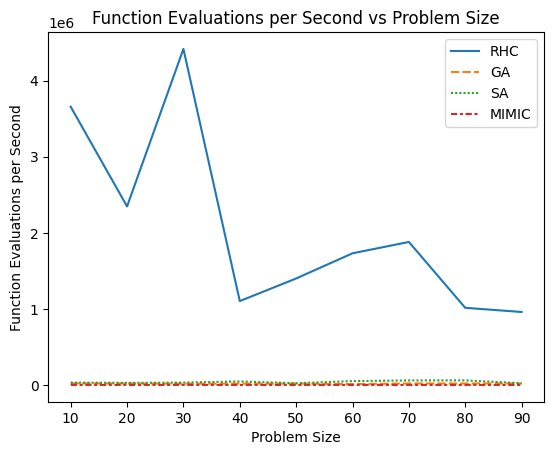

In [ ]:

fevals_sec_df = pd.concat([pd.DataFrame(rh_results)[4], pd.DataFrame(ga_results)[4],pd.DataFrame(sa_results)[4],pd.DataFrame(mim_results)[4]], ignore_index=True, axis=1)
fevals_sec_df.index=pd.DataFrame(rh_results)[0]
fevals_sec_df.columns = ["RHC","GA","SA","MIMIC"]
fevals_sec_plt = sns.lineplot(data=fevals_sec_df)
fevals_sec_plt.set_title('Function Evaluations per Second vs Problem Size')
fevals_sec_plt.set_xlabel('Problem Size')
fevals_sec_plt.set_ylabel('Function Evaluations per Second')
fevals_sec_plt

<Axes: title={'center': 'Fitness Values over Iterations'}, xlabel='Iterations', ylabel='Fitness Values'>

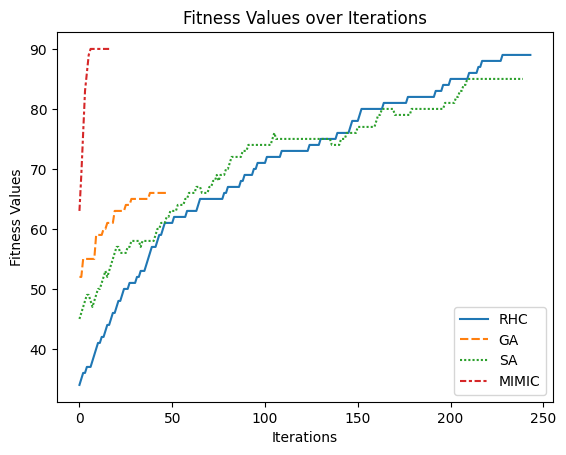

In [ ]:
# Fitness / Iteration: Since we're dealing with optimization problems, those problems will present access to a fitness score at each iteration.

fit_iter_df = pd.concat([pd.DataFrame(cur_rh_result[2][:,0]),pd.DataFrame(cur_ga_result[2][:,0]),pd.DataFrame(cur_sa_result[2][:500,0]),pd.DataFrame(cur_mim_result[2][:,0])], ignore_index=True, axis=1)
fit_iter_df.columns = ["RHC","GA","SA","MIMIC"]
fit_iter_plt = sns.lineplot(data=fit_iter_df)
fit_iter_plt.set_title('Fitness Values over Iterations')
fit_iter_plt.set_xlabel('Iterations')
fit_iter_plt.set_ylabel('Fitness Values')
fit_iter_plt

# FlipFlop - MIMIC best

In [ ]:
problem = mlrose.FlipFlop()

In [ ]:
rh_results = []
rh_params = {'max_attempts':[5,10,15,20,25],'max_iter':[2,5,10,15,20]}
for size in range(10,100,10):
    rh_results,cur_rh_result = rand_hill_eval(problem,size,rh_results,rh_params)

rh_results

[[10, 0.09129643440246582, 9.0, 15695.0, 171912.51884833846, '5_5'],
 [20, 0.2116861343383789, 18.0, 41139.0, 194339.60626934393, '10_10'],
 [30, 0.5313980579376221, 27.0, 70337.0, 132362.16984491967, '15_5'],
 [40, 0.9072647094726562, 36.0, 101414.0, 111779.94574366996, '15_5'],
 [50, 1.1734678745269775, 45.0, 143295.0, 122112.41833762336, '15_5'],
 [60, 1.866250991821289, 53.0, 195817.0, 104925.32936788992, '15_5'],
 [70, 2.335768699645996, 61.0, 245345.0, 105038.2257614737, '15_15'],
 [80, 2.9279913902282715, 69.0, 255781.0, 87357.15578045428, '15_10'],
 [90, 4.311520338058472, 78.0, 311214.0, 72181.96264850356, '15_10']]

In [ ]:
ga_results = []
ga_params = {'pop_size':[1,3,5,7,9],'mutation_prob':[0.2,0.3,0.35,0.4],'max_attempts':[10,15]}
for size in range(10,100,10):
    ga_results,cur_ga_result = gen_alg_eval(problem,size,ga_results,ga_params)

ga_results

[[10, 0.045662879943847656, 9.0, 466.0, 10205.225788935068, '3_0.3_10'],
 [20, 0.07820749282836914, 19.0, 1182.0, 15113.641382085567, '3_0.35_15'],
 [30, 0.0556793212890625, 24.0, 747.0, 13416.111811455194, '3_0.4_10'],
 [40, 0.16007542610168457, 33.0, 2146.0, 13406.180150579754, '5_0.35_15'],
 [50, 0.5247998237609863, 46.0, 3843.0, 7322.792093295838, '7_0.3_15'],
 [60, 0.10091042518615723, 51.0, 1123.0, 11128.681679106152, '3_0.3_10'],
 [70, 0.368694543838501, 62.0, 2406.0, 6525.727164147834, '5_0.3_15'],
 [80, 0.27952098846435547, 69.0, 3061.0, 10950.877130252919, '7_0.3_10'],
 [90, 0.1715843677520752, 77.0, 1718.0, 10012.567126641536, '3_0.35_10']]

In [ ]:
sa_results = []
sa_params = {'max_attempts':[5,10,15,20,25,30],'max_iter':[5,10,15,20]}
for size in range(10,100,10):
    sa_results,cur_sa_result = sim_ann_eval(problem,size,sa_results,sa_params)

sa_results

[[10, 0.0025968551635742188, 8.0, 149.0, 57377.092912229156, '10_10'],
 [20, 0.0034151077270507812, 14.0, 156.0, 45679.37894442893, '10_5'],
 [30, 0.006181478500366211, 25.0, 244.0, 39472.75720291588, '10_15'],
 [40, 0.008455753326416016, 37.0, 292.0, 34532.700840241356, '15_10'],
 [50, 0.011013984680175781, 44.0, 332.0, 30143.495713914625, '15_5'],
 [60, 0.00969243049621582, 53.0, 268.0, 27650.443312916635, '15_15'],
 [70, 0.027292728424072266, 61.0, 362.0, 13263.606128902633, '10_10'],
 [80, 0.026556015014648438, 69.0, 590.0, 22217.18882424765, '15_10'],
 [90, 0.055884361267089844, 79.0, 621.0, 11112.232222392873, '10_15']]

In [ ]:
# timed out after 34min
mim_results = []
mim_params = {'pop_size':[5],'keep_pct':[0.2]}
for size in range(10,100,10):
    mim_results,cur_mim_result = mimic_eval(problem,size,mim_results,mim_params)

mim_results

[[10, 0.6394627094268799, 9.0, 612.0, 957.0534621925125, '5_0.2'],
 [20, 3.053781509399414, 18.0, 1517.0, 496.7611452655458, '5_0.2'],
 [30, 7.352599620819092, 26.0, 2267.0, 308.32632224130987, '5_0.2'],
 [40, 13.074215650558472, 38.0, 3218.0, 246.13331200962267, '5_0.2'],
 [50, 23.808370351791382, 45.0, 4521.0, 189.89119932183146, '5_0.2'],
 [60, 35.98097276687622, 56.0, 5424.0, 150.74634127160923, '5_0.2'],
 [70, 71.2928876876831, 64.0, 9134.0, 128.11937201946208, '5_0.2'],
 [80, 87.1251335144043, 75.0, 9632.0, 110.5536325910772, '5_0.2'],
 [90, 97.91364789009094, 83.0, 9932.0, 101.4363187770184, '5_0.2']]

# Plots

<Axes: title={'center': 'Wall Clock Time vs Problem Size'}, xlabel='Problem Size', ylabel='Wall Clock Time (seconds)'>

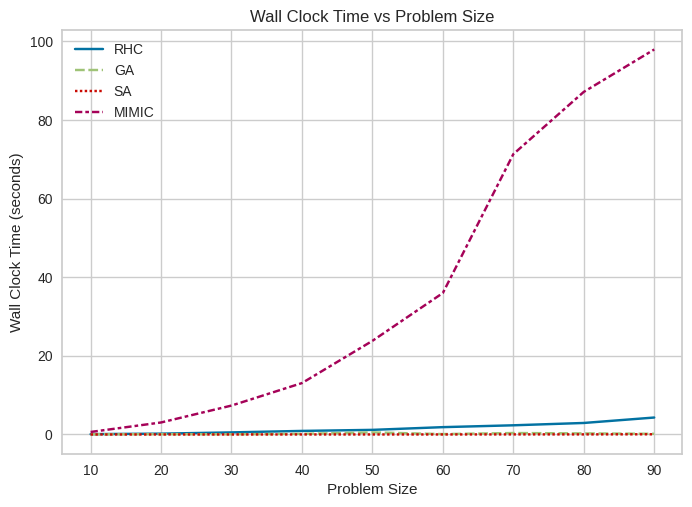

In [ ]:
# Wall Clock Time: Our favorite. Look into it.
import seaborn as sns
time_df = pd.concat([pd.DataFrame(rh_results)[1], pd.DataFrame(ga_results)[1],pd.DataFrame(sa_results)[1],pd.DataFrame(mim_results)[1]], ignore_index=True, axis=1)
time_df.index=pd.DataFrame(rh_results)[0]
time_df.columns = ["RHC","GA","SA","MIMIC"]
time_plt = sns.lineplot(data=time_df)
time_plt.set_title('Wall Clock Time vs Problem Size')
time_plt.set_xlabel('Problem Size')
time_plt.set_ylabel('Wall Clock Time (seconds)')
time_plt

<Axes: title={'center': 'Wall Clock Time vs Problem Size'}, xlabel='Problem Size', ylabel='Wall Clock Time (seconds)'>

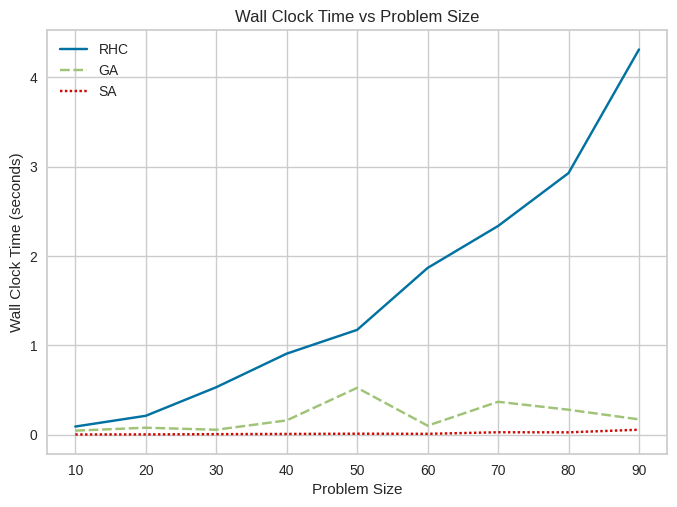

In [ ]:
# Wall Clock Time: Our favorite. Look into it.
import seaborn as sns
time_df = pd.concat([pd.DataFrame(rh_results)[1], pd.DataFrame(ga_results)[1],pd.DataFrame(sa_results)[1]], ignore_index=True, axis=1)
time_df.index=pd.DataFrame(rh_results)[0]
time_df.columns = ["RHC","GA","SA"]
time_plt = sns.lineplot(data=time_df)
time_plt.set_title('Wall Clock Time vs Problem Size')
time_plt.set_xlabel('Problem Size')
time_plt.set_ylabel('Wall Clock Time (seconds)')
time_plt

<Axes: title={'center': 'Fitness Value vs Problem Size'}, xlabel='Problem Size', ylabel='Fitness Value'>

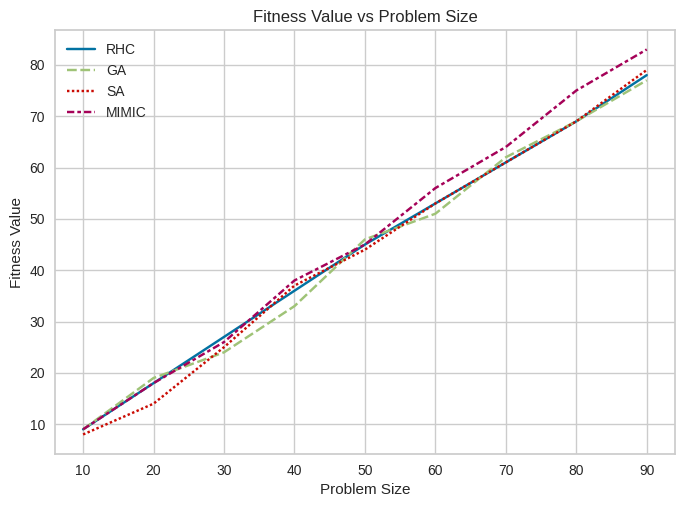

In [ ]:
# Fitness / Problem Size: Focusing on a single problem size can misrepresent how well an algorithm is actually doing. To counteract this, try multiple problem sizes.

fitness_df = pd.concat([pd.DataFrame(rh_results)[2], pd.DataFrame(ga_results)[2],pd.DataFrame(sa_results)[2],pd.DataFrame(mim_results)[2]], ignore_index=True, axis=1)
fitness_df.index=pd.DataFrame(rh_results)[0]
fitness_df.columns = ["RHC","GA","SA","MIMIC"]
fitness_plt = sns.lineplot(data=fitness_df)
fitness_plt.set_title('Fitness Value vs Problem Size')
fitness_plt.set_xlabel('Problem Size')
fitness_plt.set_ylabel('Fitness Value')
fitness_plt

<Axes: title={'center': 'Function Evaluations vs Problem Size'}, xlabel='Problem Size', ylabel='Function Evaluations'>

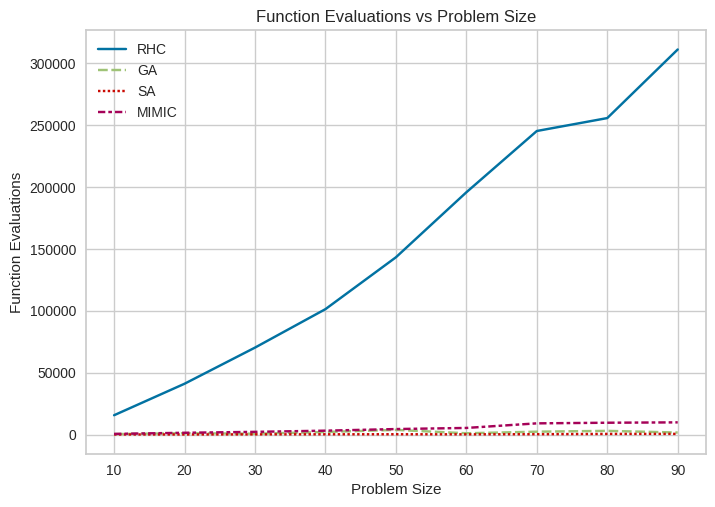

In [ ]:
# Function Evaluations: There's many ways to interpret fevals.
# Some students will focus on fevals / wall clock times, or fevals / iterations, etc.
# The real requirement is that you somehow look at fevals. Keep in mind that some algorithms may take significantly less iterations but each iteration may take significantly longer.

fevals_df = pd.concat([pd.DataFrame(rh_results)[3], pd.DataFrame(ga_results)[3],pd.DataFrame(sa_results)[3],pd.DataFrame(mim_results)[3]], ignore_index=True, axis=1)
fevals_df.index=pd.DataFrame(rh_results)[0]
fevals_df.columns = ["RHC","GA","SA","MIMIC"]
fevals_plt = sns.lineplot(data=fevals_df)
fevals_plt.set_title('Function Evaluations vs Problem Size')
fevals_plt.set_xlabel('Problem Size')
fevals_plt.set_ylabel('Function Evaluations')
fevals_plt

<Axes: title={'center': 'Function Evaluations per Second vs Problem Size'}, xlabel='Problem Size', ylabel='Function Evaluations per Second'>

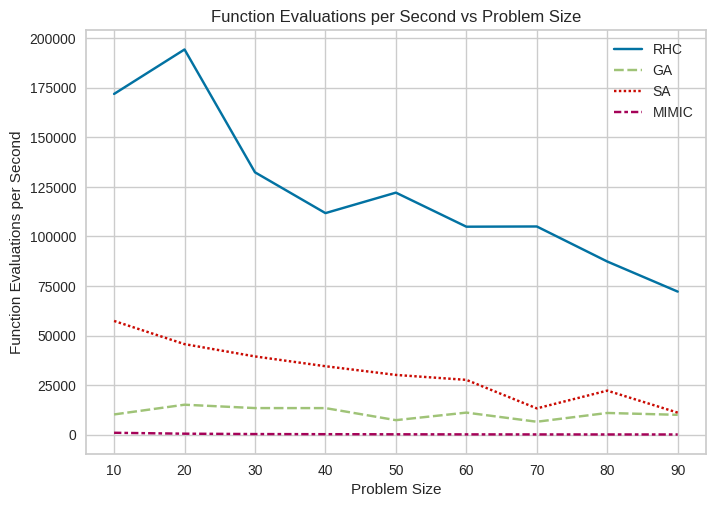

In [ ]:

fevals_sec_df = pd.concat([pd.DataFrame(rh_results)[4], pd.DataFrame(ga_results)[4],pd.DataFrame(sa_results)[4],pd.DataFrame(mim_results)[4]], ignore_index=True, axis=1)
fevals_sec_df.index=pd.DataFrame(rh_results)[0]
fevals_sec_df.columns = ["RHC","GA","SA","MIMIC"]
fevals_sec_plt = sns.lineplot(data=fevals_sec_df)
fevals_sec_plt.set_title('Function Evaluations per Second vs Problem Size')
fevals_sec_plt.set_xlabel('Problem Size')
fevals_sec_plt.set_ylabel('Function Evaluations per Second')
fevals_sec_plt

<Axes: title={'center': 'Fitness Values over Iterations'}, xlabel='Iterations', ylabel='Fitness Values'>

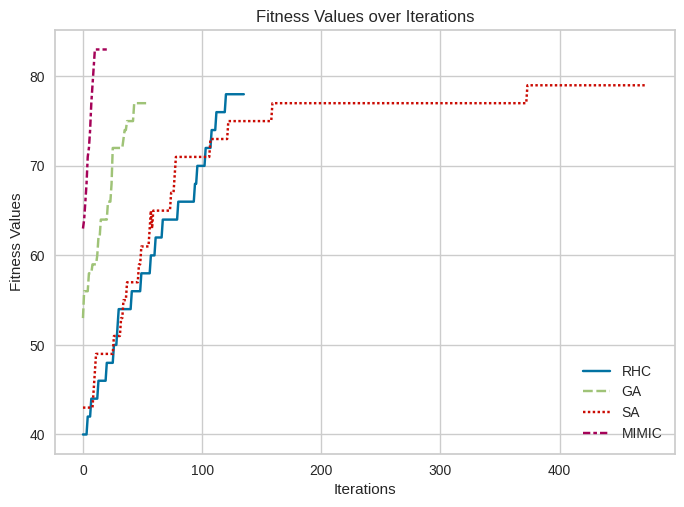

In [ ]:
# Fitness / Iteration: Since we're dealing with optimization problems, those problems will present access to a fitness score at each iteration.

fit_iter_df = pd.concat([pd.DataFrame(cur_rh_result[2][:,0]),pd.DataFrame(cur_ga_result[2][:,0]),pd.DataFrame(cur_sa_result[2][:500,0]),pd.DataFrame(cur_mim_result[2][:,0])], ignore_index=True, axis=1)
fit_iter_df.columns = ["RHC","GA","SA","MIMIC"]
fit_iter_plt = sns.lineplot(data=fit_iter_df)
fit_iter_plt.set_title('Fitness Values over Iterations')
fit_iter_plt.set_xlabel('Iterations')
fit_iter_plt.set_ylabel('Fitness Values')
fit_iter_plt

# Continuous Peak - MIMIC best but expensive, SA decent and fast, especially for larger problems

In [ ]:
problem = mlrose.ContinuousPeaks(t_pct=0.15)

In [ ]:
rh_results = []
rh_params = {'max_attempts':[5,10,15,20,25],'max_iter':[2,5,10,15,20]}
for size in range(10,100,10):
    rh_results,cur_rh_result = rand_hill_eval(problem,size,rh_results,rh_params)

rh_results

[[10, 0.03228020668029785, 17.0, 63688.0, 1972973.7368401615, '5_2'],
 [20, 0.1825268268585205, 36.0, 173671.0, 951482.0532908031, '10_5'],
 [30, 0.5280091762542725, 53.0, 260896.0, 494112.6248047643, '15_5'],
 [40, 0.7961521148681641, 65.0, 317298.0, 398539.4173732011, '25_20'],
 [50, 0.8875007629394531, 81.0, 341249.0, 384505.5849526978, '20_15'],
 [60, 1.5144214630126953, 82.0, 397264.0, 262320.6351088738, '20_2'],
 [70, 2.046259641647339, 89.0, 446185.0, 218049.06421396227, '25_15'],
 [80, 2.5276665687561035, 99.0, 473858.0, 187468.55532974488, '25_2'],
 [90, 2.4442965984344482, 27.0, 547407.0, 223952.77248702536, '25_10']]

In [ ]:
ga_results = []
ga_params = {'pop_size':[1,3,5,7,9],'mutation_prob':[0.2,0.3,0.35,0.4],'max_attempts':[10,15]}
for size in range(10,100,10):
    ga_results,cur_ga_result = gen_alg_eval(problem,size,ga_results,ga_params)

ga_results

[[10, 0.012070178985595703, 17.0, 177.0, 14664.239876743175, '1_0.2_10'],
 [20, 0.013364076614379883, 29.0, 211.0, 15788.595507822953, '1_0.3_15'],
 [30, 0.03931260108947754, 39.0, 421.0, 10709.034465610199, '1_0.4_15'],
 [40, 0.16315650939941406, 69.0, 2307.0, 14139.79747723314, '3_0.3_10'],
 [50, 0.1480090618133545, 65.0, 2046.0, 13823.477933939545, '5_0.2_10'],
 [60, 0.021418094635009766, 19.0, 290.0, 13539.953247100208, '1_0.4_10'],
 [70, 0.022023916244506836, 17.0, 289.0, 13122.098576454668, '1_0.4_15'],
 [80, 0.09773588180541992, 100.0, 1119.0, 11449.22396288183, '3_0.35_10'],
 [90, 0.07878875732421875, 25.0, 783.0, 9937.966108259901, '3_0.3_10']]

In [ ]:
sa_results = []
sa_params = {'max_attempts':[5,10,15,20,25,30,40,50,70,100],'max_iter':[5,10,15,20,25,30,40,50,60]}
for size in range(10,100,10):
    sa_results,cur_sa_result = sim_ann_eval(problem,size,sa_results,sa_params)

sa_results

[[10, 0.0005161762237548828, 15.0, 14.0, 27122.520092378752, '5_20'],
 [20, 0.004658222198486328, 31.0, 114.0, 24472.855768246493, '10_10'],
 [30, 0.018917560577392578, 49.0, 411.0, 21725.84558767928, '25_10'],
 [40, 0.06478309631347656, 69.0, 996.0, 15374.380921536876, '25_20'],
 [50, 0.06991195678710938, 49.0, 1145.0, 16377.742129099144, '25_40'],
 [60, 0.0809173583984375, 60.0, 1316.0, 16263.506694323967, '50_50'],
 [70, 0.09791374206542969, 67.0, 1404.0, 14339.151689880198, '50_15'],
 [80, 0.11306190490722656, 80.0, 1463.0, 12939.81382323667, '70_20'],
 [90, 0.28838491439819336, 77.0, 3087.0, 10704.443422229644, '40_25']]

In [ ]:
# timed out after 34min
mim_results = []
mim_params = {'pop_size':[5],'keep_pct':[0.2]}
for size in range(10,100,10):
    mim_results,cur_mim_result = mimic_eval(problem,size,mim_results,mim_params)

mim_results

[[10, 0.9026510715484619, 17.0, 612.0, 678.0028510353823, '5_0.2'],
 [20, 2.313385009765625, 31.0, 1212.0, 523.9076050392455, '5_0.2'],
 [30, 6.346621513366699, 46.0, 2268.0, 357.35548357867833, '5_0.2'],
 [40, 13.73164987564087, 63.0, 3018.0, 219.7842231146421, '5_0.2'],
 [50, 25.54293417930603, 76.0, 4775.0, 186.94015207808562, '5_0.2'],
 [60, 41.353057861328125, 89.0, 6328.0, 153.02375029242313, '5_0.2'],
 [70, 55.3597366809845, 103.0, 7378.0, 133.27375530191543, '5_0.2'],
 [80, 103.26765036582947, 132.0, 11635.0, 112.66839091218385, '5_0.2'],
 [90, 108.51089215278625, 38.0, 10833.0, 99.83329585703567, '5_0.2']]

# Plots

<Axes: title={'center': 'Wall Clock Time vs Problem Size'}, xlabel='Problem Size', ylabel='Wall Clock Time (seconds)'>

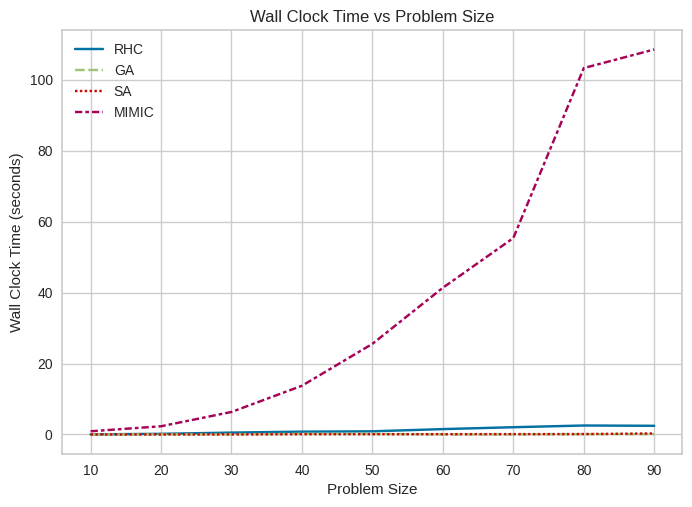

In [ ]:
# Wall Clock Time: Our favorite. Look into it.
import seaborn as sns
time_df = pd.concat([pd.DataFrame(rh_results)[1], pd.DataFrame(ga_results)[1],pd.DataFrame(sa_results)[1],pd.DataFrame(mim_results)[1]], ignore_index=True, axis=1)
time_df.index=pd.DataFrame(rh_results)[0]
time_df.columns = ["RHC","GA","SA","MIMIC"]
time_plt = sns.lineplot(data=time_df)
time_plt.set_title('Wall Clock Time vs Problem Size')
time_plt.set_xlabel('Problem Size')
time_plt.set_ylabel('Wall Clock Time (seconds)')
time_plt

<Axes: title={'center': 'Wall Clock Time vs Problem Size'}, xlabel='Problem Size', ylabel='Wall Clock Time (seconds)'>

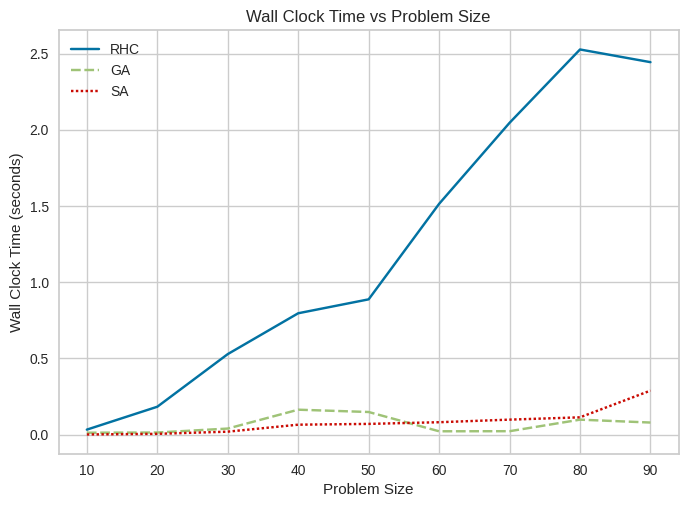

In [ ]:
# Wall Clock Time: Our favorite. Look into it.
import seaborn as sns
time_df = pd.concat([pd.DataFrame(rh_results)[1], pd.DataFrame(ga_results)[1],pd.DataFrame(sa_results)[1]], ignore_index=True, axis=1)
time_df.index=pd.DataFrame(rh_results)[0]
time_df.columns = ["RHC","GA","SA"]
time_plt = sns.lineplot(data=time_df)
time_plt.set_title('Wall Clock Time vs Problem Size')
time_plt.set_xlabel('Problem Size')
time_plt.set_ylabel('Wall Clock Time (seconds)')
time_plt

<Axes: title={'center': 'Fitness Value vs Problem Size'}, xlabel='Problem Size', ylabel='Fitness Value'>

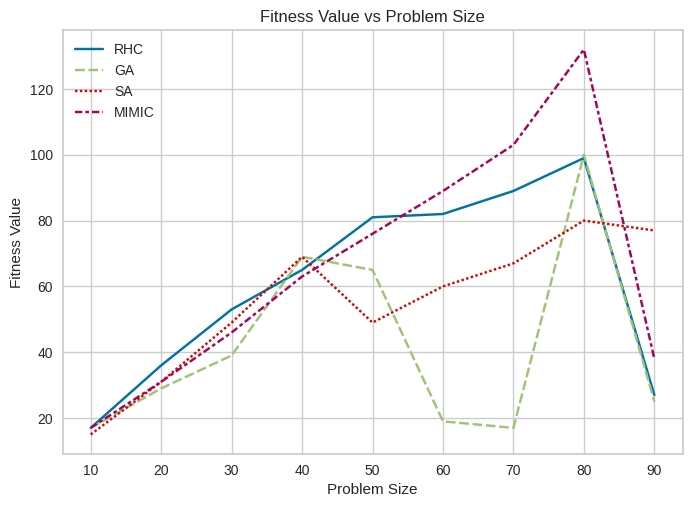

In [ ]:
# Fitness / Problem Size: Focusing on a single problem size can misrepresent how well an algorithm is actually doing. To counteract this, try multiple problem sizes.

fitness_df = pd.concat([pd.DataFrame(rh_results)[2], pd.DataFrame(ga_results)[2],pd.DataFrame(sa_results)[2],pd.DataFrame(mim_results)[2]], ignore_index=True, axis=1)
fitness_df.index=pd.DataFrame(rh_results)[0]
fitness_df.columns = ["RHC","GA","SA","MIMIC"]
fitness_plt = sns.lineplot(data=fitness_df)
fitness_plt.set_title('Fitness Value vs Problem Size')
fitness_plt.set_xlabel('Problem Size')
fitness_plt.set_ylabel('Fitness Value')
fitness_plt

<Axes: title={'center': 'Function Evaluations vs Problem Size'}, xlabel='Problem Size', ylabel='Function Evaluations'>

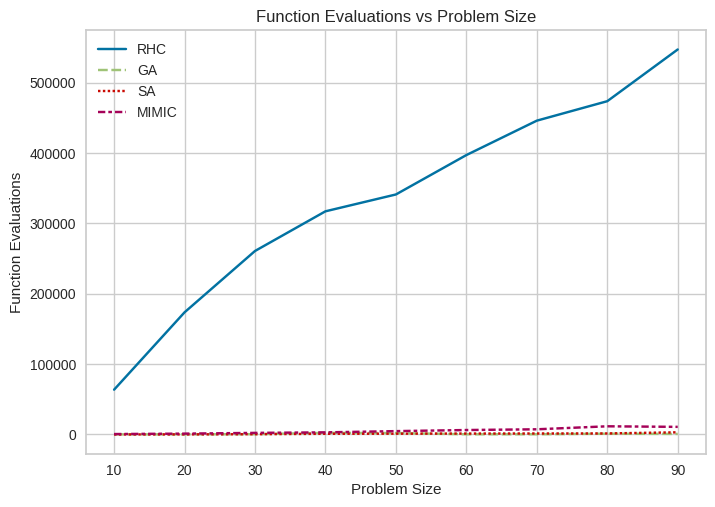

In [ ]:
# Function Evaluations: There's many ways to interpret fevals.
# Some students will focus on fevals / wall clock times, or fevals / iterations, etc.
# The real requirement is that you somehow look at fevals. Keep in mind that some algorithms may take significantly less iterations but each iteration may take significantly longer.

fevals_df = pd.concat([pd.DataFrame(rh_results)[3], pd.DataFrame(ga_results)[3],pd.DataFrame(sa_results)[3],pd.DataFrame(mim_results)[3]], ignore_index=True, axis=1)
fevals_df.index=pd.DataFrame(rh_results)[0]
fevals_df.columns = ["RHC","GA","SA","MIMIC"]
fevals_plt = sns.lineplot(data=fevals_df)
fevals_plt.set_title('Function Evaluations vs Problem Size')
fevals_plt.set_xlabel('Problem Size')
fevals_plt.set_ylabel('Function Evaluations')
fevals_plt

<Axes: title={'center': 'Function Evaluations per Second vs Problem Size'}, xlabel='Problem Size', ylabel='Function Evaluations per Second'>

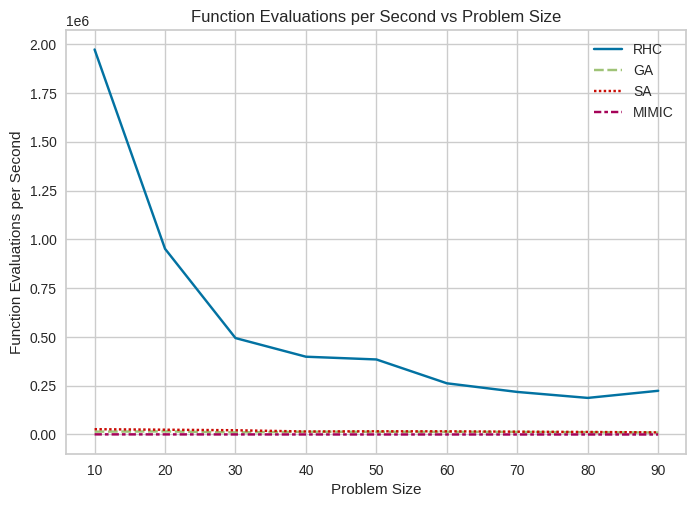

In [ ]:

fevals_sec_df = pd.concat([pd.DataFrame(rh_results)[4], pd.DataFrame(ga_results)[4],pd.DataFrame(sa_results)[4],pd.DataFrame(mim_results)[4]], ignore_index=True, axis=1)
fevals_sec_df.index=pd.DataFrame(rh_results)[0]
fevals_sec_df.columns = ["RHC","GA","SA","MIMIC"]
fevals_sec_plt = sns.lineplot(data=fevals_sec_df)
fevals_sec_plt.set_title('Function Evaluations per Second vs Problem Size')
fevals_sec_plt.set_xlabel('Problem Size')
fevals_sec_plt.set_ylabel('Function Evaluations per Second')
fevals_sec_plt

<Axes: title={'center': 'Fitness Values over Iterations'}, xlabel='Iterations', ylabel='Fitness Values'>

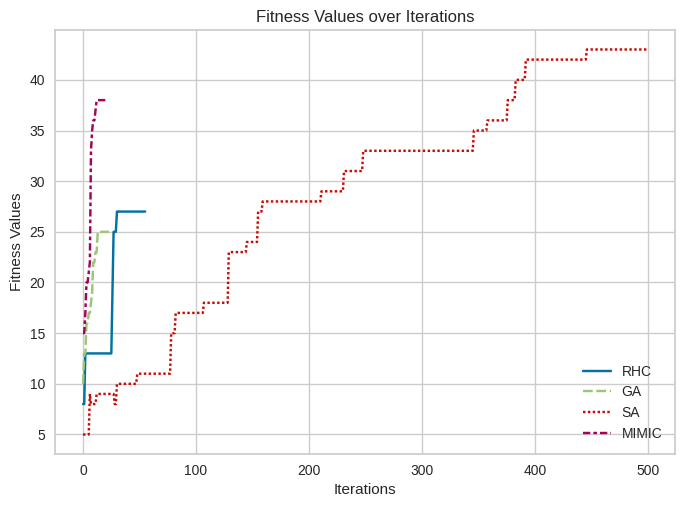

In [ ]:
# Fitness / Iteration: Since we're dealing with optimization problems, those problems will present access to a fitness score at each iteration.

fit_iter_df = pd.concat([pd.DataFrame(cur_rh_result[2][:,0]),pd.DataFrame(cur_ga_result[2][:,0]),pd.DataFrame(cur_sa_result[2][:500,0]),pd.DataFrame(cur_mim_result[2][:,0])], ignore_index=True, axis=1)
fit_iter_df.columns = ["RHC","GA","SA","MIMIC"]
fit_iter_plt = sns.lineplot(data=fit_iter_df)
fit_iter_plt.set_title('Fitness Values over Iterations')
fit_iter_plt.set_xlabel('Iterations')
fit_iter_plt.set_ylabel('Fitness Values')
fit_iter_plt